In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathtrees as pt
from object_states.config import get_cfg
from object_states.util.build_nn import load_data, dump_db

pd.options.display.max_rows = 100

In [4]:
config_name = '../config/eval_final_static.yaml'
emb_type = 'clip'

cfg = get_cfg(config_name)

In [5]:
tree = pt.tree({
    '{root_dir}': {
        '': 'dataset_dir',
        'embeddings-all/{field_name}/{video_id}/{emb_type}/{track_id}.npz': 'emb_file',
        '{emb_type}.lancedb': 'db_fname',
        'embs.npz': 'pkl',
    }
})
tree

<Paths data={} 
	dataset_dir : {root_dir}
	emb_file : {root_dir}/embeddings-all/{field_name}/{video_id}/{emb_type}/{track_id}.npz
	db_fname : {root_dir}/{emb_type}.lancedb
	pkl : {root_dir}/embs.npz
>

In [6]:
static_tree = tree.specify(root_dir=cfg.DATASET.ROOT)
static_tree

<Paths data={'root_dir': '/datasets/annotation_final'} 
	dataset_dir : /datasets/annotation_final
	emb_file : /datasets/annotation_final/embeddings-all/{field_name}/{video_id}/{emb_type}/{track_id}.npz
	db_fname : /datasets/annotation_final/{emb_type}.lancedb
	pkl : /datasets/annotation_final/embs.npz
>

In [7]:
eval_tree = tree.specify(root_dir='/datasets/ptgrecipes_eval')
eval_tree

<Paths data={'root_dir': '/datasets/ptgrecipes_eval'} 
	dataset_dir : /datasets/ptgrecipes_eval
	emb_file : /datasets/ptgrecipes_eval/embeddings-all/{field_name}/{video_id}/{emb_type}/{track_id}.npz
	db_fname : /datasets/ptgrecipes_eval/{emb_type}.lancedb
	pkl : /datasets/ptgrecipes_eval/embs.npz
>

## Loading Data

In [8]:
if static_tree.pkl.is_file() and False:
    sdf = pd.read_pickle(static_tree.pkl)
else:
    # input()
    sdf = load_data(cfg, static_tree.emb_file.specify(emb_type=emb_type).glob_format())
    sdf.to_pickle(static_tree.pkl)
print(sdf.shape)
sdf.head()

set()
bowl_kitchen_lightsoff None (1, 4)
bowl_kitchen_lightson 0 (1, 4)
bowl_nursing_lightsoff 0 (1, 4)
bowl_nursing_lightson 1 (1, 4)
bowl_oatmeal_banana_kitchenlightsoff 16 (1, 4)
bowl_oatmeal_banana_kitchenlightson 11 (1, 4)
bowl_oatmeal_banana_officelightsoff 6 (1, 4)
bowl_oatmeal_banana_officeon 14 (1, 4)
bowl_oatmeal_banana_printer 5 (1, 4)
bowl_oatmeal_cinnamon_kitchenlightsoff 8 (1, 4)
bowl_oatmeal_cinnamon_kitchenlightson 11 (1, 4)
bowl_oatmeal_cinnamon_officelightsoff 6 (1, 4)
bowl_oatmeal_cinnamon_officelightson 11 (1, 4)
bowl_oatmeal_cinnamon_printer 10 (1, 4)
bowl_oatmeal_dry_kitchen_lightsoff 8 (1, 4)
bowl_oatmeal_dry_kitchen_lightson 3 (1, 4)
bowl_oatmeal_dry_kitchen_lightson2 7 (1, 4)
bowl_oatmeal_dry_nursing_lightsoff 0 (1, 4)
bowl_oatmeal_dry_nursing_lightson 0 (1, 4)
bowl_oatmeal_dry_nursingroom_lightson2 13 (1, 4)
bowl_oatmeal_dry_office2_lightsoff 13 (1, 4)
bowl_oatmeal_dry_office2_lightson 15 (1, 4)
bowl_oatmeal_dry_office2_lightson2 8 (1, 4)
bowl_oatmeal_dry_offi

loading data...:   0%|          | 0/719 [00:00<?, ?it/s]

super_simple {'bowl_oatmeal_raisin_officelightson'}
super_simple {11}
full {'bowl_oatmeal_raisin_officelightson'}
full {11}


loading data...:   0%|          | 1/719 [00:01<14:27,  1.21s/it]

using bowl_oatmeal_raisin_officelightson.11 (1238, 3) {'full', 'super_simple'} (1238, 512)
super_simple {'bowl_oatmeal_raisin_officelightson'}
super_simple {2}
full {'bowl_oatmeal_raisin_officelightson'}
full {2}


loading data...:   0%|          | 2/719 [00:04<27:29,  2.30s/it]

using bowl_oatmeal_raisin_officelightson.2 (3218, 3) {'full', 'super_simple'} (3218, 512)
super_simple {'bowl_oatmeal_raisin_officelightson'}
super_simple {5}
full {'bowl_oatmeal_raisin_officelightson'}
full {5}


loading data...:   0%|          | 3/719 [00:07<31:07,  2.61s/it]

using bowl_oatmeal_raisin_officelightson.5 (3152, 3) {'full', 'super_simple'} (3152, 512)
super_simple {'bowl_oatmeal_raisin_officelightson'}
super_simple {0}
full {'bowl_oatmeal_raisin_officelightson'}
full {0}


loading data...:   1%|          | 4/719 [00:10<33:14,  2.79s/it]

using bowl_oatmeal_raisin_officelightson.0 (3272, 3) {'full', 'super_simple'} (3272, 512)
super_simple {'bowl_oatmeal_raisin_officelightson'}
super_simple {3}
full {'bowl_oatmeal_raisin_officelightson'}
full {3}


loading data...:   1%|          | 5/719 [00:13<34:18,  2.88s/it]

using bowl_oatmeal_raisin_officelightson.3 (3218, 3) {'full', 'super_simple'} (3218, 512)
Skipping: bowl_oatmeal_dry_printerroom_lightsoff: 4
super_simple {'bowl_oatmeal_dry_printerroom_lightsoff'}
super_simple {2}
full {'bowl_oatmeal_dry_printerroom_lightsoff'}
full {2}


loading data...:   1%|          | 7/719 [00:15<24:20,  2.05s/it]

using bowl_oatmeal_dry_printerroom_lightsoff.2 (2560, 3) {'full', 'super_simple'} (2560, 512)
Skipping: bowl_oatmeal_dry_printerroom_lightsoff: 8
Skipping: bowl_oatmeal_dry_printerroom_lightsoff: 1
super_simple {'bowl_oatmeal_dry_printerroom_lightsoff'}
super_simple {10}
full {'bowl_oatmeal_dry_printerroom_lightsoff'}
full {10}


loading data...:   1%|▏         | 10/719 [00:17<15:25,  1.30s/it]

using bowl_oatmeal_dry_printerroom_lightsoff.10 (1878, 3) {'full', 'super_simple'} (1878, 512)
super_simple {'bowl_oatmeal_dry_printerroom_lightsoff'}
super_simple {3}
full {'bowl_oatmeal_dry_printerroom_lightsoff'}
full {3}


loading data...:   2%|▏         | 11/719 [00:20<18:03,  1.53s/it]

using bowl_oatmeal_dry_printerroom_lightsoff.3 (2560, 3) {'full', 'super_simple'} (2560, 512)
full {'mug_coffee_printer'}
full {0}


loading data...:   2%|▏         | 12/719 [00:21<17:41,  1.50s/it]

using mug_coffee_printer.0 (2800, 2) {'full'} (2800, 512)
Skipping: coffee_grounds_drained_kitchen_lightson: 4
full {'coffee_grounds_drained_kitchen_lightson'}
full {0}


loading data...:   2%|▏         | 14/719 [00:23<14:47,  1.26s/it]

using coffee_grounds_drained_kitchen_lightson.0 (3442, 2) {'full'} (3442, 512)
full {'coffee_grounds_drained_kitchen_lightson'}
full {1}


loading data...:   2%|▏         | 15/719 [00:24<14:21,  1.22s/it]

using coffee_grounds_drained_kitchen_lightson.1 (2158, 2) {'full'} (2158, 512)
super_simple {'bowl_oatmeal_water_officelightson'}
super_simple {4}
full {'bowl_oatmeal_water_officelightson'}
full {4}


loading data...:   2%|▏         | 16/719 [00:27<18:12,  1.55s/it]

using bowl_oatmeal_water_officelightson.4 (2772, 3) {'full', 'super_simple'} (2772, 512)
super_simple {'bowl_oatmeal_water_officelightson'}
super_simple {2}
full {'bowl_oatmeal_water_officelightson'}
full {2}


loading data...:   2%|▏         | 17/719 [00:29<21:49,  1.86s/it]

using bowl_oatmeal_water_officelightson.2 (2970, 3) {'full', 'super_simple'} (2970, 512)
super_simple {'bowl_oatmeal_water_officelightson'}
super_simple {5}
full {'bowl_oatmeal_water_officelightson'}
full {5}


loading data...:   3%|▎         | 18/719 [00:32<24:04,  2.06s/it]

using bowl_oatmeal_water_officelightson.5 (2804, 3) {'full', 'super_simple'} (2804, 512)
super_simple {'bowl_oatmeal_water_officelightson'}
super_simple {0}
full {'bowl_oatmeal_water_officelightson'}
full {0}


loading data...:   3%|▎         | 19/719 [00:35<27:28,  2.36s/it]

using bowl_oatmeal_water_officelightson.0 (3272, 3) {'full', 'super_simple'} (3272, 512)
super_simple {'bowl_oatmeal_water_officelightson'}
super_simple {1}
full {'bowl_oatmeal_water_officelightson'}
full {1}


loading data...:   3%|▎         | 20/719 [00:36<22:51,  1.96s/it]

using bowl_oatmeal_water_officelightson.1 (994, 3) {'full', 'super_simple'} (994, 512)
super_simple {'bowl_oatmeal_water_officelightson'}
super_simple {6}
full {'bowl_oatmeal_water_officelightson'}
full {6}


loading data...:   3%|▎         | 21/719 [00:38<21:37,  1.86s/it]

using bowl_oatmeal_water_officelightson.6 (1690, 3) {'full', 'super_simple'} (1690, 512)
super_simple {'bowl_oatmeal_water_officelightson'}
super_simple {3}
full {'bowl_oatmeal_water_officelightson'}
full {3}


loading data...:   3%|▎         | 22/719 [00:41<25:02,  2.16s/it]

using bowl_oatmeal_water_officelightson.3 (3032, 3) {'full', 'super_simple'} (3032, 512)
super_simple {'bowl_oatmeal_dry_office2_lightson'}
super_simple {7}
full {'bowl_oatmeal_dry_office2_lightson'}
full {7}


loading data...:   3%|▎         | 23/719 [00:43<26:41,  2.30s/it]

using bowl_oatmeal_dry_office2_lightson.7 (2794, 3) {'full', 'super_simple'} (2794, 512)
super_simple {'bowl_oatmeal_dry_office2_lightson'}
super_simple {9}
full {'bowl_oatmeal_dry_office2_lightson'}
full {9}


loading data...:   3%|▎         | 24/719 [00:46<27:41,  2.39s/it]

using bowl_oatmeal_dry_office2_lightson.9 (2794, 3) {'full', 'super_simple'} (2794, 512)
super_simple {'bowl_oatmeal_dry_office2_lightson'}
super_simple {15}
full {'bowl_oatmeal_dry_office2_lightson'}
full {15}


loading data...:   3%|▎         | 25/719 [00:47<22:38,  1.96s/it]

using bowl_oatmeal_dry_office2_lightson.15 (972, 3) {'full', 'super_simple'} (972, 512)
super_simple {'bowl_oatmeal_dry_office2_lightson'}
super_simple {13}
full {'bowl_oatmeal_dry_office2_lightson'}
full {13}


loading data...:   4%|▎         | 26/719 [00:49<23:52,  2.07s/it]

using bowl_oatmeal_dry_office2_lightson.13 (2374, 3) {'full', 'super_simple'} (2374, 512)
super_simple {'bowl_oatmeal_dry_office2_lightson'}
super_simple {8}
full {'bowl_oatmeal_dry_office2_lightson'}
full {8}


loading data...:   4%|▍         | 27/719 [00:52<25:46,  2.23s/it]

using bowl_oatmeal_dry_office2_lightson.8 (2794, 3) {'full', 'super_simple'} (2794, 512)
super_simple {'bowl_oatmeal_dry_office2_lightson'}
super_simple {1}
full {'bowl_oatmeal_dry_office2_lightson'}
full {1}


loading data...:   4%|▍         | 30/719 [00:55<15:54,  1.39s/it]

using bowl_oatmeal_dry_office2_lightson.1 (3454, 3) {'full', 'super_simple'} (3454, 512)
Skipping: bowl_oatmeal_dry_office2_lightson: 14
Skipping: bowl_oatmeal_dry_office2_lightson: 3
Skipping: mug_nursingroom_lightson: 7
Skipping: mug_nursingroom_lightson: 0


loading data...:   5%|▌         | 36/719 [00:55<05:00,  2.27it/s]

Skipping: mug_nursingroom_lightson: 8
Skipping: mug_nursingroom_lightson: 1
Skipping: mug_nursingroom_lightson: 6
Skipping: mug_nursingroom_lightson: 12
super_simple {'bowl_oatmeal_dry_office_lightsoff'}
super_simple {7}
full {'bowl_oatmeal_dry_office_lightsoff'}
full {7}


loading data...:   5%|▌         | 36/719 [00:57<05:00,  2.27it/s]

using bowl_oatmeal_dry_office_lightsoff.7 (2348, 3) {'full', 'super_simple'} (2348, 512)
super_simple {'bowl_oatmeal_dry_office_lightsoff'}
super_simple {2}
full {'bowl_oatmeal_dry_office_lightsoff'}
full {2}


loading data...:   5%|▌         | 38/719 [01:01<12:25,  1.10s/it]

using bowl_oatmeal_dry_office_lightsoff.2 (3548, 3) {'full', 'super_simple'} (3548, 512)
super_simple {'bowl_oatmeal_dry_office_lightsoff'}
super_simple {9}
full {'bowl_oatmeal_dry_office_lightsoff'}
full {9}


loading data...:   5%|▌         | 38/719 [01:02<12:25,  1.10s/it]

using bowl_oatmeal_dry_office_lightsoff.9 (848, 3) {'full', 'super_simple'} (848, 512)
super_simple {'bowl_oatmeal_dry_office_lightsoff'}
super_simple {5}
full {'bowl_oatmeal_dry_office_lightsoff'}
full {5}


loading data...:   6%|▌         | 40/719 [01:05<15:00,  1.33s/it]

using bowl_oatmeal_dry_office_lightsoff.5 (3248, 3) {'full', 'super_simple'} (3248, 512)
super_simple {'bowl_oatmeal_dry_office_lightsoff'}
super_simple {0}
full {'bowl_oatmeal_dry_office_lightsoff'}
full {0}


loading data...:   6%|▌         | 41/719 [01:08<19:03,  1.69s/it]

using bowl_oatmeal_dry_office_lightsoff.0 (3548, 3) {'full', 'super_simple'} (3548, 512)
super_simple {'bowl_oatmeal_dry_office_lightsoff'}
super_simple {3}
full {'bowl_oatmeal_dry_office_lightsoff'}
full {3}


loading data...:   6%|▌         | 42/719 [01:11<22:39,  2.01s/it]

using bowl_oatmeal_dry_office_lightsoff.3 (3548, 3) {'full', 'super_simple'} (3548, 512)


loading data...:   6%|▌         | 42/719 [01:12<22:39,  2.01s/it]

super_simple {'oatmeal_2023.06.16-20.18.26'}
super_simple {0}
full {'oatmeal_2023.06.16-20.18.26'}
full {0}


loading data...:   6%|▌         | 43/719 [01:39<1:24:54,  7.54s/it]

using oatmeal_2023.06.16-20.18.26.0 (31548, 3) {'full', 'super_simple'} (31548, 512)


loading data...:   6%|▌         | 43/719 [01:39<1:24:54,  7.54s/it]

super_simple {'bowl_oatmeal_raisin_officelightsoff'}
super_simple {4}
full {'bowl_oatmeal_raisin_officelightsoff'}
full {4}


loading data...:   6%|▌         | 44/719 [01:42<1:13:45,  6.56s/it]

using bowl_oatmeal_raisin_officelightsoff.4 (3282, 3) {'full', 'super_simple'} (3282, 512)
super_simple {'bowl_oatmeal_raisin_officelightsoff'}
super_simple {2}
full {'bowl_oatmeal_raisin_officelightsoff'}
full {2}


loading data...:   6%|▋         | 45/719 [01:45<1:03:47,  5.68s/it]

using bowl_oatmeal_raisin_officelightsoff.2 (3330, 3) {'full', 'super_simple'} (3330, 512)
super_simple {'bowl_oatmeal_raisin_officelightsoff'}
super_simple {5}
full {'bowl_oatmeal_raisin_officelightsoff'}
full {5}


loading data...:   6%|▋         | 46/719 [01:48<55:29,  4.95s/it]  

using bowl_oatmeal_raisin_officelightsoff.5 (3162, 3) {'full', 'super_simple'} (3162, 512)
super_simple {'bowl_oatmeal_raisin_officelightsoff'}
super_simple {1}
full {'bowl_oatmeal_raisin_officelightsoff'}
full {1}


loading data...:   7%|▋         | 47/719 [01:51<49:49,  4.45s/it]

using bowl_oatmeal_raisin_officelightsoff.1 (3402, 3) {'full', 'super_simple'} (3402, 512)
super_simple {'bowl_oatmeal_raisin_officelightsoff'}
super_simple {6}
full {'bowl_oatmeal_raisin_officelightsoff'}
full {6}


loading data...:   7%|▋         | 48/719 [01:54<44:45,  4.00s/it]

using bowl_oatmeal_raisin_officelightsoff.6 (3102, 3) {'full', 'super_simple'} (3102, 512)
super_simple {'bowl_oatmeal_raisin_officelightsoff'}
super_simple {3}
full {'bowl_oatmeal_raisin_officelightsoff'}
full {3}


loading data...:   7%|▋         | 49/719 [01:57<41:59,  3.76s/it]

using bowl_oatmeal_raisin_officelightsoff.3 (3402, 3) {'full', 'super_simple'} (3402, 512)
super_simple {'bowl_oatmeal_raisin_kitchenlightson'}
super_simple {4}
full {'bowl_oatmeal_raisin_kitchenlightson'}
full {4}


loading data...:   7%|▋         | 50/719 [02:00<39:23,  3.53s/it]

using bowl_oatmeal_raisin_kitchenlightson.4 (3030, 3) {'full', 'super_simple'} (3030, 512)
super_simple {'bowl_oatmeal_raisin_kitchenlightson'}
super_simple {2}
full {'bowl_oatmeal_raisin_kitchenlightson'}
full {2}


loading data...:   7%|▋         | 51/719 [02:03<37:32,  3.37s/it]

using bowl_oatmeal_raisin_kitchenlightson.2 (3210, 3) {'full', 'super_simple'} (3210, 512)
super_simple {'bowl_oatmeal_raisin_kitchenlightson'}
super_simple {9}
full {'bowl_oatmeal_raisin_kitchenlightson'}
full {9}


loading data...:   7%|▋         | 52/719 [02:04<29:50,  2.68s/it]

using bowl_oatmeal_raisin_kitchenlightson.9 (1080, 3) {'full', 'super_simple'} (1080, 512)
super_simple {'bowl_oatmeal_raisin_kitchenlightson'}
super_simple {0}
full {'bowl_oatmeal_raisin_kitchenlightson'}
full {0}


loading data...:   7%|▋         | 53/719 [02:07<30:28,  2.75s/it]

using bowl_oatmeal_raisin_kitchenlightson.0 (3078, 3) {'full', 'super_simple'} (3078, 512)
super_simple {'bowl_oatmeal_raisin_kitchenlightson'}
super_simple {1}
full {'bowl_oatmeal_raisin_kitchenlightson'}
full {1}


loading data...:   8%|▊         | 55/719 [02:10<22:37,  2.04s/it]

using bowl_oatmeal_raisin_kitchenlightson.1 (3270, 3) {'full', 'super_simple'} (3270, 512)
Skipping: IMG_7704: 11


loading data...:   8%|▊         | 56/719 [02:10<16:15,  1.47s/it]

Skipping: IMG_7704: 17


loading data...:   8%|▊         | 57/719 [02:11<12:15,  1.11s/it]

Skipping: IMG_7704: 4


loading data...:   8%|▊         | 58/719 [02:11<09:29,  1.16it/s]

Skipping: IMG_7704: 2
Skipping: IMG_7704: 9


loading data...:   9%|▊         | 62/719 [02:11<03:55,  2.79it/s]

Skipping: IMG_7704: 5
Skipping: IMG_7704: 15
Skipping: IMG_7704: 0


loading data...:   9%|▉         | 65/719 [02:12<02:40,  4.09it/s]

Skipping: IMG_7704: 8
Skipping: IMG_7704: 22
Skipping: IMG_7704: 1


loading data...:  10%|▉         | 69/719 [02:12<01:32,  7.02it/s]

Skipping: IMG_7704: 20
Skipping: IMG_7704: 14
Skipping: IMG_7704: 10
Skipping: IMG_7704: 12


loading data...:  10%|▉         | 71/719 [02:13<01:42,  6.35it/s]

Skipping: IMG_7704: 3
super_simple {'bowl_orange_booth_lightsoff'}
super_simple {0}
full {'bowl_orange_booth_lightsoff'}
full {0}
using bowl_orange_booth_lightsoff.0 (40, 3) {'full', 'super_simple'} (40, 512)
Skipping: nowl_oatmeal_dry_nursingroom_lightson: 11


loading data...:  10%|█         | 75/719 [02:13<01:07,  9.51it/s]

Skipping: nowl_oatmeal_dry_nursingroom_lightson: 4
Skipping: nowl_oatmeal_dry_nursingroom_lightson: 2
Skipping: nowl_oatmeal_dry_nursingroom_lightson: 15
Skipping: nowl_oatmeal_dry_nursingroom_lightson: 1


loading data...:  11%|█         | 80/719 [02:13<00:43, 14.72it/s]

Skipping: nowl_oatmeal_dry_nursingroom_lightson: 20
Skipping: nowl_oatmeal_dry_nursingroom_lightson: 3
Skipping: coffee_grounds_dry_to_wet_kitchen_lightson: 2
Skipping: coffee_grounds_dry_to_wet_kitchen_lightson: 1
super_simple {'bowl_oatmeal_honey_kitchenlightson'}
super_simple {4}
full {'bowl_oatmeal_honey_kitchenlightson'}
full {4}


loading data...:  11%|█         | 80/719 [02:16<00:43, 14.72it/s]

using bowl_oatmeal_honey_kitchenlightson.4 (2616, 3) {'full', 'super_simple'} (2616, 512)
super_simple {'bowl_oatmeal_honey_kitchenlightson'}
super_simple {2}
full {'bowl_oatmeal_honey_kitchenlightson'}
full {2}


loading data...:  11%|█▏        | 82/719 [02:18<08:00,  1.33it/s]

using bowl_oatmeal_honey_kitchenlightson.2 (2946, 3) {'full', 'super_simple'} (2946, 512)
Skipping: bowl_oatmeal_honey_kitchenlightson: 9
super_simple {'bowl_oatmeal_honey_kitchenlightson'}
super_simple {0}
full {'bowl_oatmeal_honey_kitchenlightson'}
full {0}


loading data...:  12%|█▏        | 84/719 [02:21<09:58,  1.06it/s]

using bowl_oatmeal_honey_kitchenlightson.0 (3110, 3) {'full', 'super_simple'} (3110, 512)
super_simple {'bowl_oatmeal_honey_kitchenlightson'}
super_simple {1}
full {'bowl_oatmeal_honey_kitchenlightson'}
full {1}


loading data...:  12%|█▏        | 85/719 [02:24<13:25,  1.27s/it]

using bowl_oatmeal_honey_kitchenlightson.1 (3110, 3) {'full', 'super_simple'} (3110, 512)
super_simple {'bowl_oatmeal_honey_kitchenlightson'}
super_simple {6}
full {'bowl_oatmeal_honey_kitchenlightson'}
full {6}


loading data...:  12%|█▏        | 87/719 [02:26<12:35,  1.20s/it]

using bowl_oatmeal_honey_kitchenlightson.6 (2508, 3) {'full', 'super_simple'} (2508, 512)
full {'mug_filter_office_lightsoff'}
full {11}
using mug_filter_office_lightsoff.11 (314, 2) {'full'} (314, 512)


loading data...:  13%|█▎        | 90/719 [02:27<06:42,  1.56it/s]

Skipping: mug_filter_office_lightsoff: 4
Skipping: mug_filter_office_lightsoff: 8
Skipping: mug_filter_office_lightsoff: 6
full {'mug_filter_office_lightsoff'}
full {12}
using mug_filter_office_lightsoff.12 (74, 2) {'full'} (74, 512)


loading data...:  13%|█▎        | 92/719 [02:27<04:46,  2.19it/s]

Skipping: mug_filter_office_lightsoff: 3
Skipping: package_office_lightsoff: 13


loading data...:  13%|█▎        | 92/719 [02:27<04:46,  2.19it/s]

super_simple {'package_office_lightsoff'}
super_simple {0}
full {'package_office_lightsoff'}
full {0}


loading data...:  13%|█▎        | 94/719 [02:49<39:39,  3.81s/it]

using package_office_lightsoff.0 (24708, 3) {'full', 'super_simple'} (24708, 512)


loading data...:  13%|█▎        | 94/719 [02:50<39:39,  3.81s/it]

super_simple {'rolled_nursingroom_lightson2'}
super_simple {0}
full {'rolled_nursingroom_lightson2'}
full {0}


loading data...:  13%|█▎        | 95/719 [03:10<1:12:06,  6.93s/it]

using rolled_nursingroom_lightson2.0 (22296, 3) {'full', 'super_simple'} (22296, 512)


loading data...:  13%|█▎        | 97/719 [03:11<45:31,  4.39s/it]  

Skipping: rolled_nursingroom_lightson2: 1
Skipping: rolled_nursingroom_lightson2: 3


loading data...:  13%|█▎        | 97/719 [03:11<45:31,  4.39s/it]

Skipping: coffee_grounds_wet_office_lightsoff: 2
full {'coffee_grounds_wet_office_lightsoff'}
full {0}


loading data...:  14%|█▍        | 99/719 [03:12<29:24,  2.85s/it]

using coffee_grounds_wet_office_lightsoff.0 (1746, 2) {'full'} (1746, 512)
super_simple {'peanut-butter_orangeroom_lightsoff'}
super_simple {0}
full {'peanut-butter_orangeroom_lightsoff'}
full {0}


loading data...:  14%|█▍        | 100/719 [03:34<1:12:36,  7.04s/it]

using peanut-butter_orangeroom_lightsoff.0 (23496, 3) {'full', 'super_simple'} (23496, 512)


loading data...:  15%|█▍        | 105/719 [03:34<23:47,  2.32s/it]  

Skipping: coffee_grounds_wet_kitchen_lightson: 19
Skipping: coffee_grounds_wet_kitchen_lightson: 2
Skipping: coffee_grounds_wet_kitchen_lightson: 15
Skipping: coffee_grounds_wet_kitchen_lightson: 21
Skipping: coffee_grounds_wet_kitchen_lightson: 13
Skipping: coffee_grounds_wet_kitchen_lightson: 8
Skipping: coffee_grounds_wet_kitchen_lightson: 20


loading data...:  15%|█▍        | 105/719 [03:35<23:47,  2.32s/it]

Skipping: coffee_grounds_wet_kitchen_lightson: 6
Skipping: coffee_grounds_wet_kitchen_lightson: 3
super_simple {'plain_kitchen_lightsoff'}
super_simple {0}
full {'plain_kitchen_lightsoff'}
full {0}


loading data...:  15%|█▌        | 110/719 [03:55<33:09,  3.27s/it]

using plain_kitchen_lightsoff.0 (20520, 3) {'full', 'super_simple'} (20520, 512)


loading data...:  15%|█▌        | 111/719 [03:56<29:24,  2.90s/it]

Skipping: pb_jelly_kitchen_lightsoff: 7
super_simple {'pb_jelly_kitchen_lightsoff'}
super_simple {0}
full {'pb_jelly_kitchen_lightsoff'}
full {0}


loading data...:  16%|█▌        | 112/719 [04:16<56:34,  5.59s/it]

using pb_jelly_kitchen_lightsoff.0 (22020, 3) {'full', 'super_simple'} (22020, 512)


loading data...:  16%|█▌        | 112/719 [04:17<56:34,  5.59s/it]

super_simple {'pb_jelly_kitchen_lightsoff'}
super_simple {1}
full {'pb_jelly_kitchen_lightsoff'}
full {1}


loading data...:  16%|█▌        | 113/719 [04:37<1:23:46,  8.30s/it]

using pb_jelly_kitchen_lightsoff.1 (22020, 3) {'full', 'super_simple'} (22020, 512)


loading data...:  16%|█▌        | 114/719 [04:37<1:07:36,  6.71s/it]

Skipping: pb_jelly_kitchen_lightsoff: 6


loading data...:  16%|█▌        | 114/719 [04:38<1:07:36,  6.71s/it]

super_simple {'tortilla_nutella_kitchen_lightoff'}
super_simple {0}
full {'tortilla_nutella_kitchen_lightoff'}
full {0}


loading data...:  16%|█▌        | 115/719 [04:59<1:42:38, 10.20s/it]

using tortilla_nutella_kitchen_lightoff.0 (22788, 3) {'full', 'super_simple'} (22788, 512)


loading data...:  16%|█▌        | 115/719 [05:00<1:42:38, 10.20s/it]

super_simple {'bowl_oatmeal_cinnamon_officelightsoff'}
super_simple {4}
full {'bowl_oatmeal_cinnamon_officelightsoff'}
full {4}


loading data...:  16%|█▌        | 116/719 [05:03<1:25:28,  8.50s/it]

using bowl_oatmeal_cinnamon_officelightsoff.4 (2990, 3) {'full', 'super_simple'} (2990, 512)
super_simple {'bowl_oatmeal_cinnamon_officelightsoff'}
super_simple {2}
full {'bowl_oatmeal_cinnamon_officelightsoff'}
full {2}


loading data...:  16%|█▋        | 117/719 [05:06<1:11:13,  7.10s/it]

using bowl_oatmeal_cinnamon_officelightsoff.2 (3178, 3) {'full', 'super_simple'} (3178, 512)
super_simple {'bowl_oatmeal_cinnamon_officelightsoff'}
super_simple {5}
full {'bowl_oatmeal_cinnamon_officelightsoff'}
full {5}


loading data...:  16%|█▋        | 118/719 [05:09<1:00:10,  6.01s/it]

using bowl_oatmeal_cinnamon_officelightsoff.5 (3178, 3) {'full', 'super_simple'} (3178, 512)
super_simple {'bowl_oatmeal_cinnamon_officelightsoff'}
super_simple {1}
full {'bowl_oatmeal_cinnamon_officelightsoff'}
full {1}


loading data...:  17%|█▋        | 119/719 [05:12<51:56,  5.19s/it]  

using bowl_oatmeal_cinnamon_officelightsoff.1 (3178, 3) {'full', 'super_simple'} (3178, 512)
super_simple {'bowl_oatmeal_cinnamon_officelightsoff'}
super_simple {6}
full {'bowl_oatmeal_cinnamon_officelightsoff'}
full {6}


loading data...:  17%|█▋        | 120/719 [05:15<44:22,  4.44s/it]

using bowl_oatmeal_cinnamon_officelightsoff.6 (2682, 3) {'full', 'super_simple'} (2682, 512)
super_simple {'bowl_oatmeal_cinnamon_officelightsoff'}
super_simple {3}
full {'bowl_oatmeal_cinnamon_officelightsoff'}
full {3}


loading data...:  17%|█▋        | 121/719 [05:18<40:14,  4.04s/it]

using bowl_oatmeal_cinnamon_officelightsoff.3 (3178, 3) {'full', 'super_simple'} (3178, 512)


loading data...:  17%|█▋        | 121/719 [05:18<40:14,  4.04s/it]

super_simple {'tortilla_nutella_banana_window'}
super_simple {0}
full {'tortilla_nutella_banana_window'}
full {0}


loading data...:  17%|█▋        | 122/719 [05:48<1:55:40, 11.63s/it]

using tortilla_nutella_banana_window.0 (31884, 3) {'full', 'super_simple'} (31884, 512)


loading data...:  17%|█▋        | 122/719 [05:48<1:55:40, 11.63s/it]

super_simple {'bowl_oatmeal_water_kitchenslightsoff'}
super_simple {4}
full {'bowl_oatmeal_water_kitchenslightsoff'}
full {4}


loading data...:  17%|█▋        | 123/719 [05:51<1:31:05,  9.17s/it]

using bowl_oatmeal_water_kitchenslightsoff.4 (3122, 3) {'full', 'super_simple'} (3122, 512)
super_simple {'bowl_oatmeal_water_kitchenslightsoff'}
super_simple {2}
full {'bowl_oatmeal_water_kitchenslightsoff'}
full {2}


loading data...:  17%|█▋        | 123/719 [05:53<28:31,  2.87s/it]  


KeyboardInterrupt: 

In [10]:
sdf1 = pd.read_pickle('/datasets/annotation_final/embs-bkp1.pkl')
sdf1.shape
sdf1.head()

index object super_simple_state               full_state  track_id  \
0   1170   bowl     oatmeal+raisin  oatmeal+raisins[cooked]        11   
1   1170   bowl     oatmeal+raisin  oatmeal+raisins[cooked]        11   
2   1171   bowl     oatmeal+raisin  oatmeal+raisins[cooked]        11   
3   1171   bowl     oatmeal+raisin  oatmeal+raisins[cooked]        11   
4   1172   bowl     oatmeal+raisin  oatmeal+raisins[cooked]        11   

                             video_id  augmented  \
0  bowl_oatmeal_raisin_officelightson      False   
1  bowl_oatmeal_raisin_officelightson       True   
2  bowl_oatmeal_raisin_officelightson      False   
3  bowl_oatmeal_raisin_officelightson       True   
4  bowl_oatmeal_raisin_officelightson      False   

                                              vector  
0  [-0.03436873, 0.027611338, 0.026201684, -0.008...  
1  [-0.018154893, 0.0022606833, 0.02195018, -0.02...  
2  [-0.034791756, 0.024617022, 0.015127339, 0.023...  
3  [-0.01810643, -0.00075632305, 0.018185746, -0....  
4  [-0.029866016, 0.027375344, 0.017181225, 0.018...

In [11]:
video_ids = sdf.video_id.unique()

In [16]:
fs=static_tree.emb_file.specify(emb_type=emb_type).glob()
fs=[f for f in fs if not any(v in f for v in video_ids)]
len(fs), fs[0]

205

In [18]:

sdf2 = load_data(cfg, fs)

set()
bowl_kitchen_lightsoff None (1, 4)
bowl_kitchen_lightson 0 (1, 4)
bowl_nursing_lightsoff 0 (1, 4)
bowl_nursing_lightson 1 (1, 4)
bowl_oatmeal_banana_kitchenlightsoff 16 (1, 4)
bowl_oatmeal_banana_kitchenlightson 11 (1, 4)
bowl_oatmeal_banana_officelightsoff 6 (1, 4)
bowl_oatmeal_banana_officeon 14 (1, 4)
bowl_oatmeal_banana_printer 5 (1, 4)
bowl_oatmeal_cinnamon_kitchenlightsoff 8 (1, 4)
bowl_oatmeal_cinnamon_kitchenlightson 11 (1, 4)
bowl_oatmeal_cinnamon_officelightsoff 6 (1, 4)
bowl_oatmeal_cinnamon_officelightson 11 (1, 4)
bowl_oatmeal_cinnamon_printer 10 (1, 4)
bowl_oatmeal_dry_kitchen_lightsoff 8 (1, 4)
bowl_oatmeal_dry_kitchen_lightson 3 (1, 4)
bowl_oatmeal_dry_kitchen_lightson2 7 (1, 4)
bowl_oatmeal_dry_nursing_lightsoff 0 (1, 4)
bowl_oatmeal_dry_nursing_lightson 0 (1, 4)
bowl_oatmeal_dry_nursingroom_lightson2 13 (1, 4)
bowl_oatmeal_dry_office2_lightsoff 13 (1, 4)
bowl_oatmeal_dry_office2_lightson 15 (1, 4)
bowl_oatmeal_dry_office2_lightson2 8 (1, 4)
bowl_oatmeal_dry_offi

bowl_oatmeal_honey_printer 6 (1, 4)
bowl_oatmeal_raisin_kitchenlightsoff 11 (1, 4)
bowl_oatmeal_raisin_kitchenlightson 9 (1, 4)
bowl_oatmeal_raisin_officelightsoff 6 (1, 4)
bowl_oatmeal_raisin_officelightson 11 (1, 4)
bowl_oatmeal_raisin_printer 12 (1, 4)
bowl_oatmeal_water_kitchenslightsoff 10 (1, 4)
bowl_oatmeal_water_kitchenslightson None (1, 4)
bowl_oatmeal_water_officelightsoff 5 (1, 4)
bowl_oatmeal_water_officelightson 6 (1, 4)
bowl_oatmeal_water_printer 11 (1, 4)
bowl_office_lightsoff 0 (1, 4)
bowl_office_lightson 7 (1, 4)
bowl_orange_booth_lightsoff 0 (1, 4)
bowl_orange_booth_lightson 0 (1, 4)
bowl_printer 0 (1, 4)
bowl_staircase 0 (1, 4)
bowl_window 0 (1, 4)
folded_kitchen_lightsoff 0 (1, 4)
folded_kitchen_lightson None (1, 4)
folded_nursing_lightsoff 0 (1, 4)
folded_nursing_lightson 0 (1, 4)
folded_office_lightsoff 0 (1, 4)
folded_office_lightson None (1, 4)
folded_orange_booth_lightsoff 0 (1, 4)
folded_orange_booth_lightson 0 (1, 4)
folded_printer 0 (1, 4)
folded_staircase 0

loading data...:   0%|          | 0/205 [00:00<?, ?it/s]

full {'mug_coffee_printer'}
full {0}


loading data...:   0%|          | 1/205 [00:02<06:47,  2.00s/it]

using mug_coffee_printer.0 (2800, 2) {'full'} (2800, 512)
Skipping: coffee_grounds_drained_kitchen_lightson: 4
full {'coffee_grounds_drained_kitchen_lightson'}
full {0}


loading data...:   1%|▏         | 3/205 [00:03<03:58,  1.18s/it]

using coffee_grounds_drained_kitchen_lightson.0 (3442, 2) {'full'} (3442, 512)
full {'coffee_grounds_drained_kitchen_lightson'}
full {1}


loading data...:   6%|▌         | 12/205 [00:05<00:47,  4.07it/s]

using coffee_grounds_drained_kitchen_lightson.1 (2158, 2) {'full'} (2158, 512)
Skipping: mug_nursingroom_lightson: 7
Skipping: mug_nursingroom_lightson: 0
Skipping: mug_nursingroom_lightson: 8
Skipping: mug_nursingroom_lightson: 1
Skipping: mug_nursingroom_lightson: 6
Skipping: mug_nursingroom_lightson: 12
Skipping: IMG_7704: 11
Skipping: IMG_7704: 17


loading data...:   7%|▋         | 15/205 [00:05<00:36,  5.16it/s]

Skipping: IMG_7704: 4
Skipping: IMG_7704: 2
Skipping: IMG_7704: 9
Skipping: IMG_7704: 5
Skipping: IMG_7704: 15


loading data...:   9%|▉         | 19/205 [00:05<00:25,  7.25it/s]

Skipping: IMG_7704: 0
Skipping: IMG_7704: 8
Skipping: IMG_7704: 22
Skipping: IMG_7704: 1
Skipping: IMG_7704: 20
Skipping: IMG_7704: 14
Skipping: IMG_7704: 10
Skipping: IMG_7704: 12


loading data...:  13%|█▎        | 26/205 [00:05<00:14, 12.17it/s]

Skipping: IMG_7704: 3
Skipping: nowl_oatmeal_dry_nursingroom_lightson: 11
Skipping: nowl_oatmeal_dry_nursingroom_lightson: 4
Skipping: nowl_oatmeal_dry_nursingroom_lightson: 2
Skipping: nowl_oatmeal_dry_nursingroom_lightson: 15
Skipping: nowl_oatmeal_dry_nursingroom_lightson: 1
Skipping: nowl_oatmeal_dry_nursingroom_lightson: 20
Skipping: nowl_oatmeal_dry_nursingroom_lightson: 3
Skipping: coffee_grounds_dry_to_wet_kitchen_lightson: 2
Skipping: coffee_grounds_dry_to_wet_kitchen_lightson: 1
full {'mug_filter_office_lightsoff'}
full {11}


loading data...:  18%|█▊        | 36/205 [00:05<00:08, 19.00it/s]

using mug_filter_office_lightsoff.11 (314, 2) {'full'} (314, 512)
Skipping: mug_filter_office_lightsoff: 4
Skipping: mug_filter_office_lightsoff: 8
Skipping: mug_filter_office_lightsoff: 6
full {'mug_filter_office_lightsoff'}
full {12}
using mug_filter_office_lightsoff.12 (74, 2) {'full'} (74, 512)
Skipping: mug_filter_office_lightsoff: 3
Skipping: coffee_grounds_wet_office_lightsoff: 2
full {'coffee_grounds_wet_office_lightsoff'}
full {0}


loading data...:  21%|██        | 43/205 [00:06<00:12, 12.64it/s]

using coffee_grounds_wet_office_lightsoff.0 (1746, 2) {'full'} (1746, 512)
Skipping: coffee_grounds_wet_kitchen_lightson: 19
Skipping: coffee_grounds_wet_kitchen_lightson: 2
Skipping: coffee_grounds_wet_kitchen_lightson: 15
Skipping: coffee_grounds_wet_kitchen_lightson: 21
Skipping: coffee_grounds_wet_kitchen_lightson: 13
Skipping: coffee_grounds_wet_kitchen_lightson: 8
Skipping: coffee_grounds_wet_kitchen_lightson: 20
Skipping: coffee_grounds_wet_kitchen_lightson: 6
Skipping: coffee_grounds_wet_kitchen_lightson: 3


loading data...:  26%|██▌       | 53/205 [00:07<00:08, 17.52it/s]

Skipping: mug_window_lightson: 2
Skipping: mug_window_lightson: 5


loading data...:  26%|██▌       | 53/205 [00:07<00:08, 17.52it/s]

Skipping: mug_window_lightson: 0


loading data...:  26%|██▌       | 53/205 [00:07<00:08, 17.52it/s]

Skipping: mug_window_lightson: 1


loading data...:  28%|██▊       | 57/205 [00:07<00:12, 11.88it/s]

Skipping: mug_window_lightson: 3
Skipping: on_plate_quesadilla_printer: 4


loading data...:  29%|██▉       | 60/205 [00:08<00:13, 11.15it/s]

Skipping: on_plate_quesadilla_printer: 2
Skipping: on_plate_quesadilla_printer: 9
Skipping: on_plate_quesadilla_printer: 0
Skipping: on_plate_quesadilla_printer: 16


loading data...:  31%|███       | 63/205 [00:08<00:11, 12.25it/s]

Skipping: on_plate_quesadilla_printer: 1
Skipping: on_plate_quesadilla_printer: 10


loading data...:  32%|███▏      | 65/205 [00:08<00:12, 10.95it/s]

Skipping: package_window_lightson: 2


loading data...:  32%|███▏      | 65/205 [00:08<00:12, 10.95it/s]

Skipping: package_window_lightson: 0


loading data...:  34%|███▎      | 69/205 [00:09<00:15,  8.65it/s]

Skipping: package_window_lightson: 37
Skipping: mug_filter_nursing_lightsoff: 4
Skipping: mug_filter_nursing_lightsoff: 2
full {'mug_filter_nursing_lightsoff'}
full {9}


loading data...:  34%|███▎      | 69/205 [00:09<00:15,  8.65it/s]

using mug_filter_nursing_lightsoff.9 (176, 2) {'full'} (176, 512)
full {'mug_filter_nursing_lightsoff'}
full {0}


loading data...:  35%|███▌      | 72/205 [00:10<00:30,  4.32it/s]

using mug_filter_nursing_lightsoff.0 (2514, 2) {'full'} (2514, 512)
full {'mug_filter_nursing_lightsoff'}
full {8}
using mug_filter_nursing_lightsoff.8 (176, 2) {'full'} (176, 512)
Skipping: mug_filter_nursing_lightsoff: 3
Skipping: mug_kitchen_lightson: 11


loading data...:  38%|███▊      | 77/205 [00:11<00:17,  7.48it/s]

Skipping: mug_kitchen_lightson: 4
Skipping: mug_kitchen_lightson: 2
Skipping: mug_kitchen_lightson: 1
Skipping: mug_filter_staircase: 7


loading data...:  39%|███▊      | 79/205 [00:11<00:14,  8.93it/s]

Skipping: mug_filter_staircase: 5
Skipping: mug_filter_staircase: 0
full {'coffee_grounds_drained_office_lightsoff'}
full {0}


loading data...:  40%|███▉      | 81/205 [00:12<00:27,  4.50it/s]

using coffee_grounds_drained_office_lightsoff.0 (1862, 2) {'full'} (1862, 512)
full {'coffee_grounds_drained_office_lightsoff'}
full {1}


loading data...:  40%|████      | 83/205 [00:13<00:44,  2.76it/s]

using coffee_grounds_drained_office_lightsoff.1 (2636, 2) {'full'} (2636, 512)
Skipping: rolled_office_lightsoff: 9


loading data...:  41%|████▏     | 85/205 [00:13<00:36,  3.31it/s]

Skipping: rolled_office_lightsoff: 0
Skipping: rolled_office_lightsoff: 1


loading data...:  44%|████▍     | 91/205 [00:14<00:14,  7.97it/s]

Skipping: rolled_office_lightsoff: 3
Skipping: coffee_grounds_dry_to_wet_pour_office_lightsoff: 11
Skipping: coffee_grounds_dry_to_wet_pour_office_lightsoff: 7
Skipping: coffee_grounds_dry_to_wet_pour_office_lightsoff: 5
Skipping: coffee_grounds_dry_to_wet_pour_office_lightsoff: 0
Skipping: coffee_grounds_dry_to_wet_pour_office_lightsoff: 12
Skipping: coffee_grounds_dry_to_wet_pour_office_lightsoff: 3


loading data...:  46%|████▌     | 94/205 [00:14<00:10, 10.64it/s]

Skipping: mug_kitchen_lightsoff: 7
Skipping: mug_kitchen_lightsoff: 1
Skipping: mug_kitchen_lightsoff: 6


loading data...:  47%|████▋     | 96/205 [00:14<00:10, 10.40it/s]

Skipping: tortilla_nutella_banana_nursing_lighton: 0


loading data...:  48%|████▊     | 98/205 [00:14<00:11,  9.45it/s]

Skipping: tortilla_nutella_banana_nursing_lighton: 1
Skipping: coffee_stack_grounds_wet_window: 7
Skipping: coffee_stack_grounds_wet_window: 5
Skipping: coffee_stack_grounds_wet_window: 8
full {'coffee_stack_grounds_wet_window'}
full {1}


loading data...:  51%|█████     | 104/205 [00:16<00:18,  5.44it/s]

using coffee_stack_grounds_wet_window.1 (3078, 2) {'full'} (3078, 512)
Skipping: coffee_stack_grounds_wet_window: 6
Skipping: coffee_stack_grounds_wet_window: 3
Skipping: mug_filter_printer: 7
Skipping: mug_filter_printer: 4
Skipping: mug_filter_printer: 1


loading data...:  52%|█████▏    | 107/205 [00:16<00:13,  7.36it/s]

Skipping: mug_filter_printer: 6
Skipping: coffee_grounds_drained_office_lightson: 2
Skipping: coffee_grounds_drained_office_lightson: 5
full {'coffee_grounds_drained_office_lightson'}
full {0}


loading data...:  54%|█████▎    | 110/205 [00:18<00:26,  3.54it/s]

using coffee_grounds_drained_office_lightson.0 (3504, 2) {'full'} (3504, 512)
Skipping: IMG_7703: 11


loading data...:  55%|█████▍    | 112/205 [00:18<00:23,  3.91it/s]

Skipping: IMG_7703: 4
Skipping: IMG_7703: 2


loading data...:  56%|█████▌    | 114/205 [00:18<00:20,  4.44it/s]

Skipping: IMG_7703: 9


loading data...:  57%|█████▋    | 116/205 [00:19<00:18,  4.92it/s]

Skipping: IMG_7703: 5
Skipping: IMG_7703: 15


loading data...:  57%|█████▋    | 117/205 [00:19<00:18,  4.72it/s]

Skipping: IMG_7703: 0
Skipping: IMG_7703: 8


loading data...:  58%|█████▊    | 119/205 [00:19<00:17,  4.99it/s]

Skipping: IMG_7703: 1


loading data...:  59%|█████▊    | 120/205 [00:20<00:17,  4.74it/s]

Skipping: IMG_7703: 6
Skipping: IMG_7703: 14


loading data...:  60%|█████▉    | 122/205 [00:20<00:17,  4.83it/s]

Skipping: IMG_7703: 3
Skipping: coffee_grounds_dry_to_wet_pour: 0
Skipping: coffee_grounds_dry_to_wet_pour: 1
Skipping: coffee_grounds_dry_to_wet_pour: 3


loading data...:  62%|██████▏   | 127/205 [00:20<00:11,  7.09it/s]

Skipping: sliced_quesadilla_nursing_lightson: 0
Skipping: sliced_quesadilla_nursing_lightson: 1


loading data...:  62%|██████▏   | 127/205 [00:21<00:11,  7.09it/s]

Skipping: sliced_quesadilla_nursing_lightson: 3
Skipping: sliced_pinwheel_kitchen_lightsoff: 0
Skipping: coffee_grounds_wet_pour_window: 4
full {'coffee_grounds_wet_pour_window'}
full {0}


loading data...:  64%|██████▍   | 131/205 [00:21<00:11,  6.17it/s]

using coffee_grounds_wet_pour_window.0 (1226, 2) {'full'} (1226, 512)
Skipping: coffee_grounds_wet_pour_window: 8
full {'coffee_grounds_wet_pour_window'}
full {1}


loading data...:  65%|██████▍   | 133/205 [00:22<00:17,  4.17it/s]

using coffee_grounds_wet_pour_window.1 (1806, 2) {'full'} (1806, 512)
Skipping: coffee_grounds_wet_pour_window: 10
Skipping: IMG_7702: 11


loading data...:  66%|██████▋   | 136/205 [00:22<00:13,  5.27it/s]

Skipping: IMG_7702: 7


loading data...:  67%|██████▋   | 137/205 [00:23<00:13,  4.99it/s]

Skipping: IMG_7702: 4


loading data...:  67%|██████▋   | 138/205 [00:23<00:13,  4.87it/s]

Skipping: IMG_7702: 2


loading data...:  68%|██████▊   | 139/205 [00:23<00:13,  4.83it/s]

Skipping: IMG_7702: 5
Skipping: IMG_7702: 15


loading data...:  69%|██████▉   | 141/205 [00:23<00:11,  5.38it/s]

Skipping: IMG_7702: 0


loading data...:  70%|██████▉   | 143/205 [00:24<00:12,  5.09it/s]

Skipping: IMG_7702: 1
Skipping: IMG_7702: 6


loading data...:  71%|███████   | 145/205 [00:24<00:08,  7.05it/s]

Skipping: IMG_7702: 10
Skipping: IMG_7702: 3


loading data...:  71%|███████   | 146/205 [00:24<00:09,  6.32it/s]

Skipping: rolled_office_lightson: 0


loading data...:  72%|███████▏  | 148/205 [00:25<00:08,  6.47it/s]

Skipping: rolled_office_lightson: 1
Skipping: IMG_7701: 11


loading data...:  73%|███████▎  | 149/205 [00:25<00:09,  5.63it/s]

Skipping: IMG_7701: 4


loading data...:  73%|███████▎  | 150/205 [00:25<00:10,  5.05it/s]

Skipping: IMG_7701: 2


loading data...:  74%|███████▍  | 152/205 [00:25<00:10,  4.85it/s]

Skipping: IMG_7701: 5
Skipping: IMG_7701: 0


loading data...:  75%|███████▌  | 154/205 [00:26<00:09,  5.24it/s]

Skipping: IMG_7701: 8
Skipping: IMG_7701: 1


loading data...:  76%|███████▌  | 155/205 [00:26<00:09,  5.28it/s]

Skipping: IMG_7701: 6


loading data...:  77%|███████▋  | 157/205 [00:26<00:09,  5.18it/s]

Skipping: IMG_7701: 3
Skipping: sliced_quesadilla_kitchen_lightson: 0


loading data...:  78%|███████▊  | 159/205 [00:27<00:08,  5.40it/s]

Skipping: sliced_quesadilla_kitchen_lightson: 1
Skipping: package_kitchen_lightson: 2


loading data...:  78%|███████▊  | 160/205 [00:27<00:08,  5.35it/s]

Skipping: package_kitchen_lightson: 0
Skipping: mug_coffee_orange_booth_lightson: 0
full {'mug_coffee_orange_booth_lightson'}
full {8}


loading data...:  79%|███████▉  | 162/205 [00:27<00:06,  6.59it/s]

using mug_coffee_orange_booth_lightson.8 (366, 2) {'full'} (366, 512)
full {'mug_coffee_orange_booth_lightson'}
full {3}


loading data...:  80%|███████▉  | 163/205 [00:28<00:14,  2.88it/s]

using mug_coffee_orange_booth_lightson.3 (1770, 2) {'full'} (1770, 512)
Skipping: sliced_pinwheel_office_lightson: 0


loading data...:  81%|████████  | 166/205 [00:28<00:08,  4.47it/s]

Skipping: rolled_toothpick_kitchen_lightson: 2
Skipping: rolled_toothpick_kitchen_lightson: 1
full {'mug_filter_orange_booth_lightson'}
full {0}


loading data...:  81%|████████▏ | 167/205 [00:29<00:14,  2.62it/s]

using mug_filter_orange_booth_lightson.0 (1644, 2) {'full'} (1644, 512)
full {'mug_filter_orange_booth_lightson'}
full {8}


loading data...:  83%|████████▎ | 171/205 [00:30<00:06,  5.05it/s]

using mug_filter_orange_booth_lightson.8 (594, 2) {'full'} (594, 512)
Skipping: tea_2023.06.16-18.32.06: 1
Skipping: mug_office_lightson: 4
Skipping: mug_office_lightson: 2
Skipping: mug_office_lightson: 0


loading data...:  85%|████████▍ | 174/205 [00:30<00:03,  7.76it/s]

Skipping: mug_office_lightson: 1
Skipping: coffee_grounds_wet_office_lightson: 4
full {'coffee_grounds_wet_office_lightson'}
full {0}


loading data...:  85%|████████▍ | 174/205 [00:31<00:03,  7.76it/s]

using coffee_grounds_wet_office_lightson.0 (2910, 2) {'full'} (2910, 512)
full {'coffee_grounds_wet_office_lightson'}
full {1}


loading data...:  86%|████████▌ | 176/205 [00:32<00:11,  2.45it/s]

using coffee_grounds_wet_office_lightson.1 (1354, 2) {'full'} (1354, 512)
Skipping: coffee_grounds_drained_window: 4
Skipping: coffee_grounds_drained_window: 2
full {'coffee_grounds_drained_window'}
full {0}


loading data...:  87%|████████▋ | 179/205 [00:34<00:12,  2.14it/s]

using coffee_grounds_drained_window.0 (3218, 2) {'full'} (3218, 512)
full {'coffee_grounds_drained_window'}
full {1}


loading data...:  90%|████████▉ | 184/205 [00:35<00:07,  2.87it/s]

using coffee_grounds_drained_window.1 (2962, 2) {'full'} (2962, 512)
Skipping: bowl_oatmeal_water_kitchenslightson: 18
Skipping: bowl_oatmeal_water_kitchenslightson: 17
Skipping: bowl_oatmeal_water_kitchenslightson: 7
Skipping: bowl_oatmeal_water_kitchenslightson: 4
Skipping: bowl_oatmeal_water_kitchenslightson: 2


loading data...:  92%|█████████▏| 188/205 [00:36<00:03,  4.60it/s]

Skipping: bowl_oatmeal_water_kitchenslightson: 0
Skipping: bowl_oatmeal_water_kitchenslightson: 10
Skipping: bowl_oatmeal_water_kitchenslightson: 3
Skipping: mug_printerroom_lightsoff: 5


loading data...:  93%|█████████▎| 190/205 [00:36<00:02,  5.81it/s]

Skipping: mug_printerroom_lightsoff: 1
Skipping: mug_printerroom_lightsoff: 3
full {'mug_coffee_kithchen_lightson'}
full {11}


loading data...:  94%|█████████▎| 192/205 [00:36<00:02,  5.71it/s]

using mug_coffee_kithchen_lightson.11 (534, 2) {'full'} (534, 512)
full {'mug_coffee_kithchen_lightson'}
full {9}


loading data...:  96%|█████████▌| 197/205 [00:37<00:00,  8.27it/s]

using mug_coffee_kithchen_lightson.9 (532, 2) {'full'} (532, 512)
Skipping: mug_coffee_kithchen_lightson: 8
Skipping: mug_office_lightsoff: 7
Skipping: mug_office_lightsoff: 2
Skipping: mug_office_lightsoff: 9
Skipping: mug_office_lightsoff: 0


loading data...:  98%|█████████▊| 200/205 [00:37<00:00, 10.51it/s]

Skipping: mug_office_lightsoff: 8
Skipping: mug_office_lightsoff: 1
Skipping: mug_office_lightsoff: 6
Skipping: mug_office_lightsoff: 3


loading data...: 100%|██████████| 205/205 [00:37<00:00,  5.47it/s]


Skipping: bowl_kitchen_lightsoff: 2
Skipping: bowl_kitchen_lightsoff: 9
Skipping: bowl_kitchen_lightsoff: 3


In [23]:
sdf = pd.concat([sdf1, sdf2])
print(sdf.shape, sdf1.shape, sdf2.shape)
sdf.head()

(2938360, 8) (2894964, 8) (43396, 7)


index object super_simple_state               full_state  track_id  \
0   1170   bowl     oatmeal+raisin  oatmeal+raisins[cooked]        11   
1   1170   bowl     oatmeal+raisin  oatmeal+raisins[cooked]        11   
2   1171   bowl     oatmeal+raisin  oatmeal+raisins[cooked]        11   
3   1171   bowl     oatmeal+raisin  oatmeal+raisins[cooked]        11   
4   1172   bowl     oatmeal+raisin  oatmeal+raisins[cooked]        11   

                             video_id  augmented  \
0  bowl_oatmeal_raisin_officelightson      False   
1  bowl_oatmeal_raisin_officelightson       True   
2  bowl_oatmeal_raisin_officelightson      False   
3  bowl_oatmeal_raisin_officelightson       True   
4  bowl_oatmeal_raisin_officelightson      False   

                                              vector  
0  [-0.03436873, 0.027611338, 0.026201684, -0.008...  
1  [-0.018154893, 0.0022606833, 0.02195018, -0.02...  
2  [-0.034791756, 0.024617022, 0.015127339, 0.023...  
3  [-0.01810643, -0.00075632305, 0.018185746, -0....  
4  [-0.029866016, 0.027375344, 0.017181225, 0.018...

In [24]:
# sdf['location'] = sdf.video_id.apply(lambda x: next((l for l in ['printer', 'nursing', 'office', 'kitchen', 'stairwell', 'window'] if l in x), None))
# sdf['lightson'] = sdf.video_id.apply(lambda x: 'lightsoff' not in x and 'lightoff' not in x or 'printer' in x)
# print(sdf.location.value_counts())
# sdf.lightson.value_counts()

In [25]:
sdf.object.value_counts()

object
tortilla    1860348
bowl         737776
mug          273948
plate         66288
Name: count, dtype: int64

In [26]:
sdf.groupby('object').full_state.value_counts()

object    full_state                                   
bowl      oatmeal[dry]                                     148786
          oatmeal+raisins[cooked]+banana                   137414
          oatmeal+raisins[cooked]                          113426
          oatmeal+raisins[cooked]+banana+cinnamon+honey     90244
          oatmeal+raisins[cooked]+banana+cinnamon           84534
          oatmeal+water                                     80996
          empty                                             43364
          oatmeal[cooked]+raisins                           18288
          oatmeal[cooked]                                   16104
          oatmeal+raisins[cooked]+cinnamon+honey             2352
          oatmeal+raisins[cooked]+cinnamon                   2268
mug       teabag+stirrer                                    73912
          teabag                                            61584
          dripper+filter+coffee[dry]                        22422
          tea-bag+wa

In [27]:
RENAME = {
    '[partial]': '',
    '[full]': '',
    'floss-underneath': 'ends-cut',
    'floss-crossed': 'ends-cut',
    'raisins[cooked]': 'raisins',
    'oatmeal[cooked]+raisins': 'oatmeal+raisins',
    'teabag': 'tea-bag',
    '+stirrer': '',
    '[stirred]': '',
    'water+honey': 'water',
    'with-quesadilla': 'with-food',
    'with-pinwheels': 'with-food',
}
sdf['mod_state'] = sdf.full_state.copy()
for old, new in RENAME.items():
    sdf['mod_state'] = sdf.mod_state.str.replace(old, new)
sdf = sdf[~sdf.mod_state.isin(['folding', 'rolling', 'oatmeal+raisins+cinnamon', 'oatmeal+raisins+cinnamon+honey', 'on-plate'])]
sdf.groupby('object').mod_state.value_counts()

object    mod_state                            
bowl      oatmeal[dry]                             148786
          oatmeal+raisins+banana                   137414
          oatmeal+raisins                          131714
          oatmeal+raisins+banana+cinnamon+honey     90244
          oatmeal+raisins+banana+cinnamon           84534
          oatmeal+water                             80996
          empty                                     43364
          oatmeal[cooked]                           16104
mug       tea-bag                                  153292
          tea-bag+water                             27792
          dripper+filter+coffee[dry]                22422
          dripper+filter+coffee[drained]            19782
          dripper+filter                            15832
          dripper+filter+coffee[wet]                12120
          dripper[empty]                             9244
          empty                                      7056
          water         

## Label Distribution

In [28]:
# plt.figure(figsize=(15, 2))
# plt.subplot(121)
# sdf.location.value_counts().plot.barh()
# plt.subplot(122)
# sdf.lightson.value_counts().plot.barh()

<Axes: ylabel='video_id'>

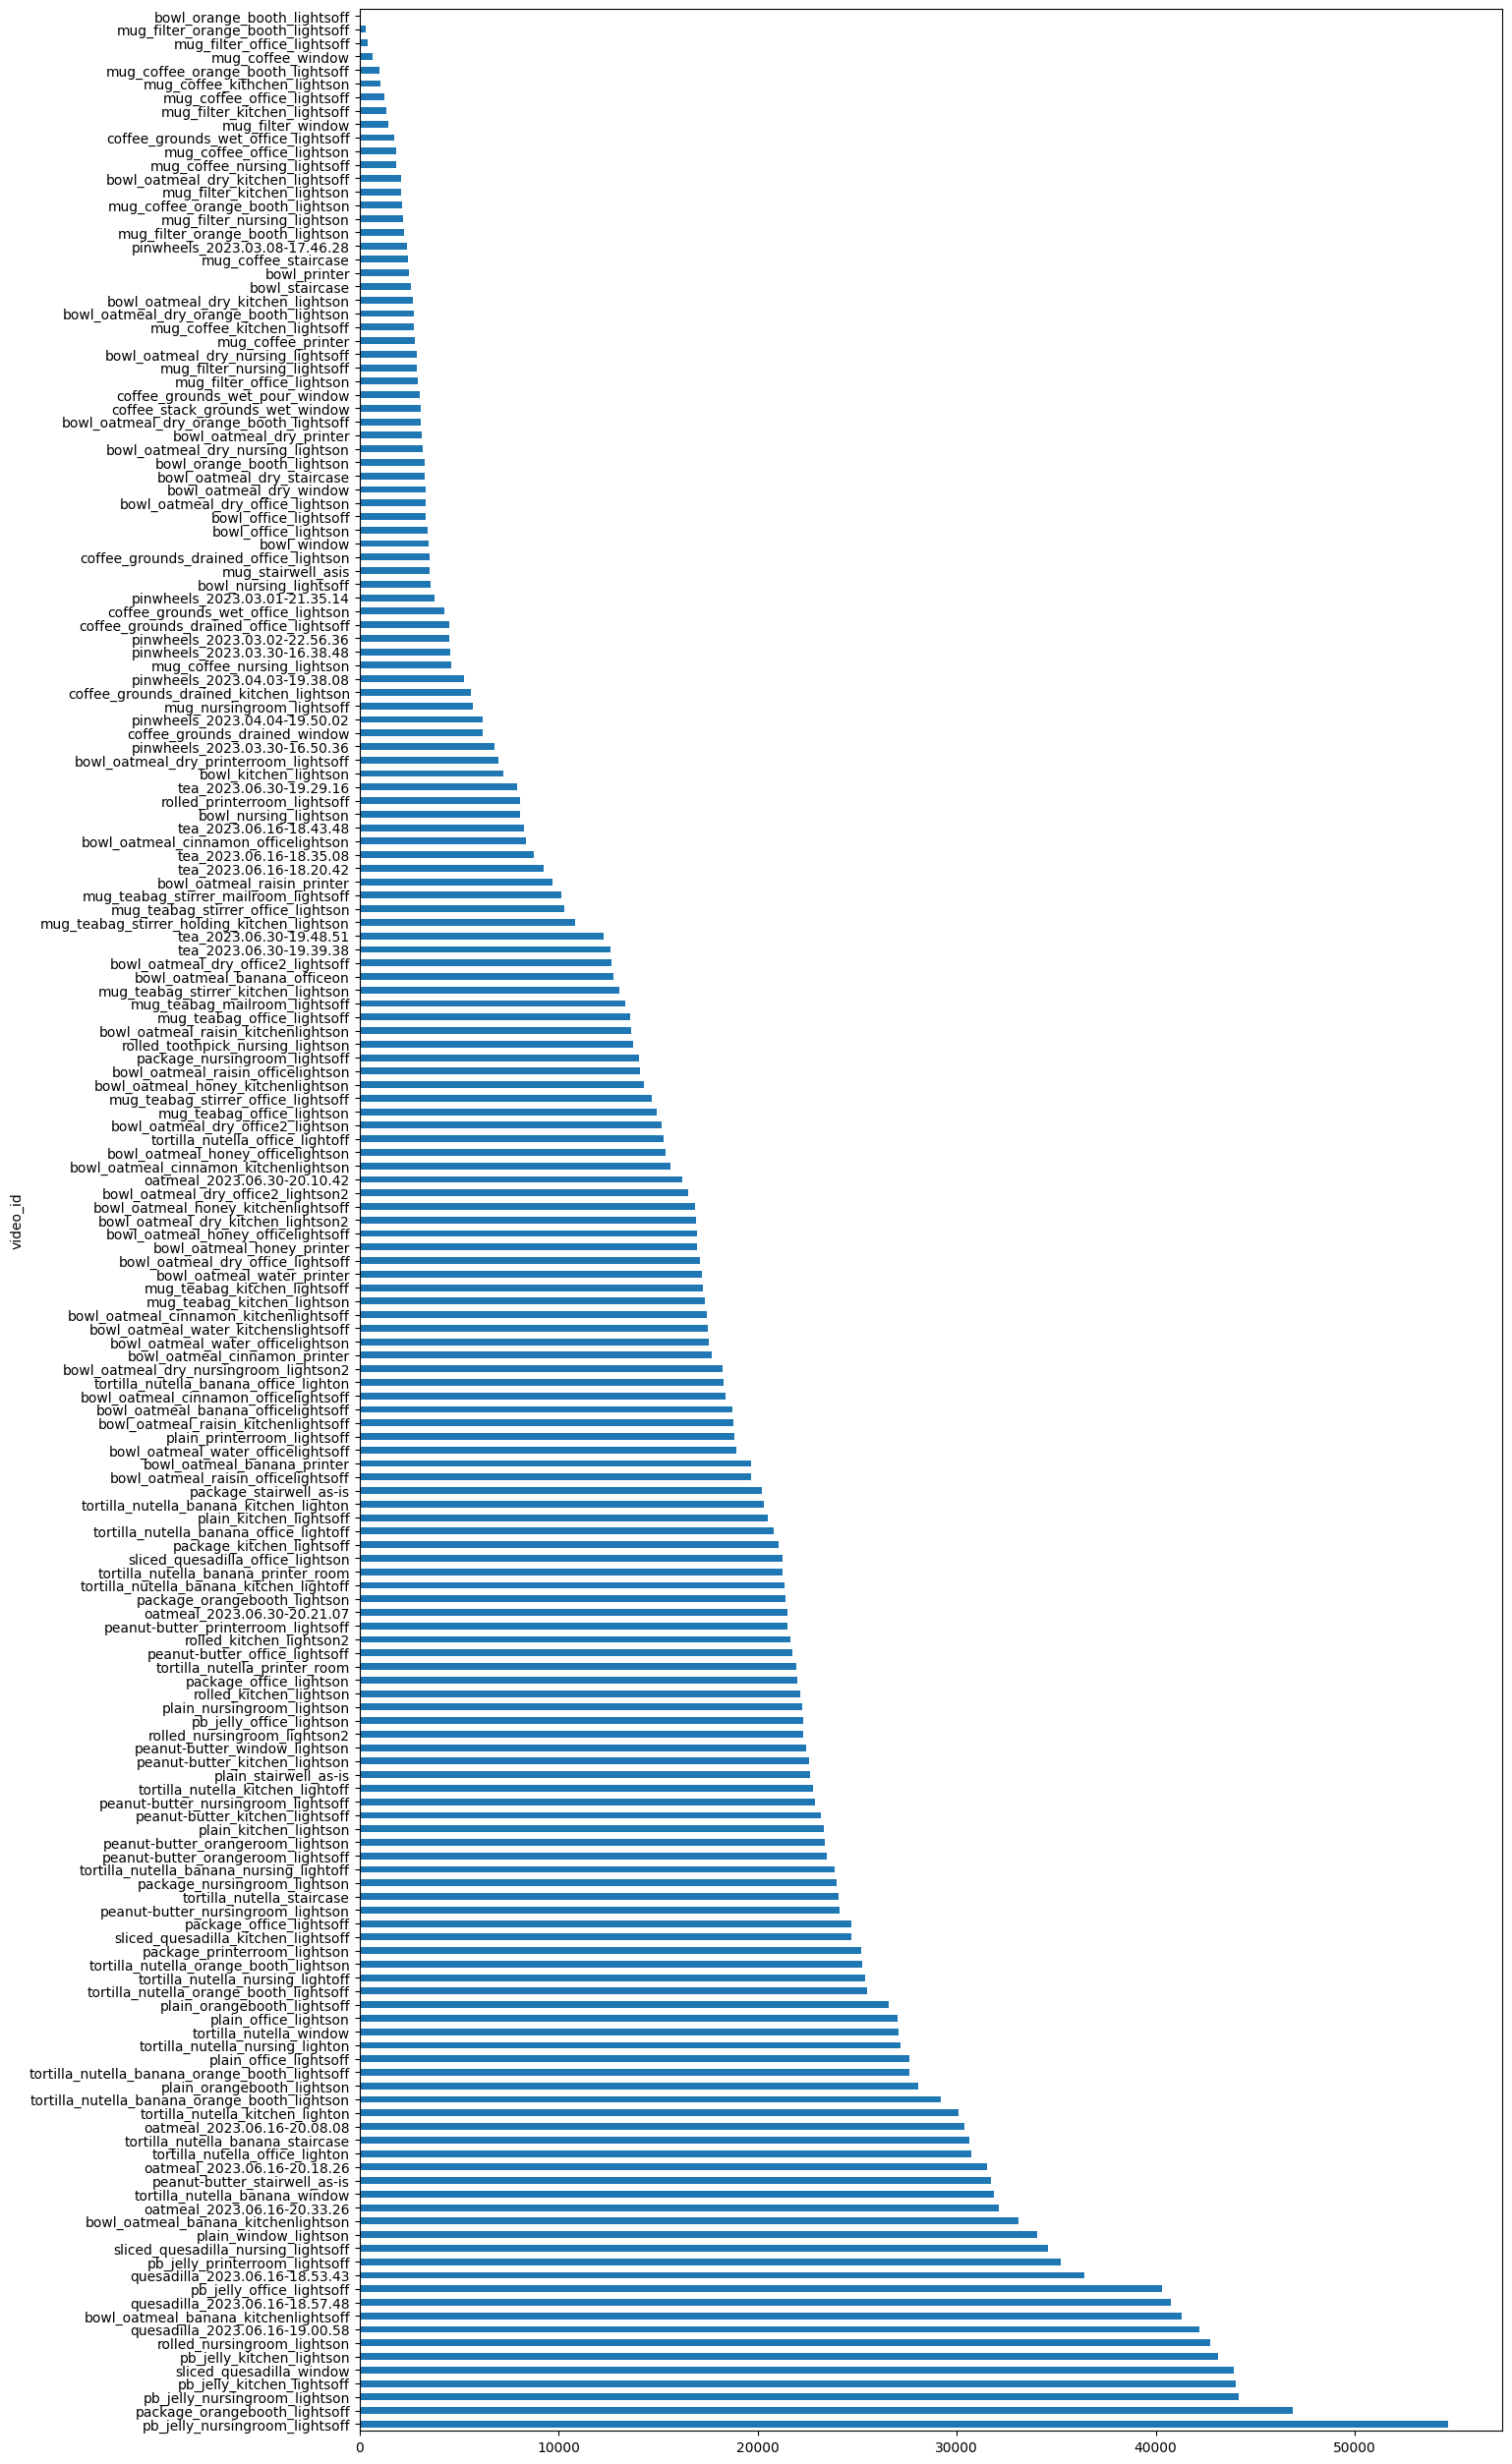

In [29]:
plt.figure(figsize=(15, 32))
sdf.video_id.value_counts().plot.barh()

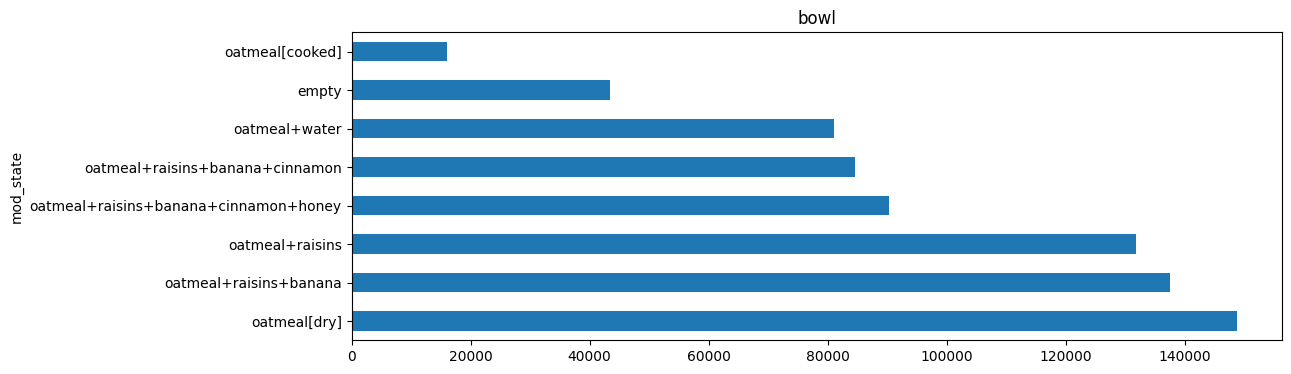

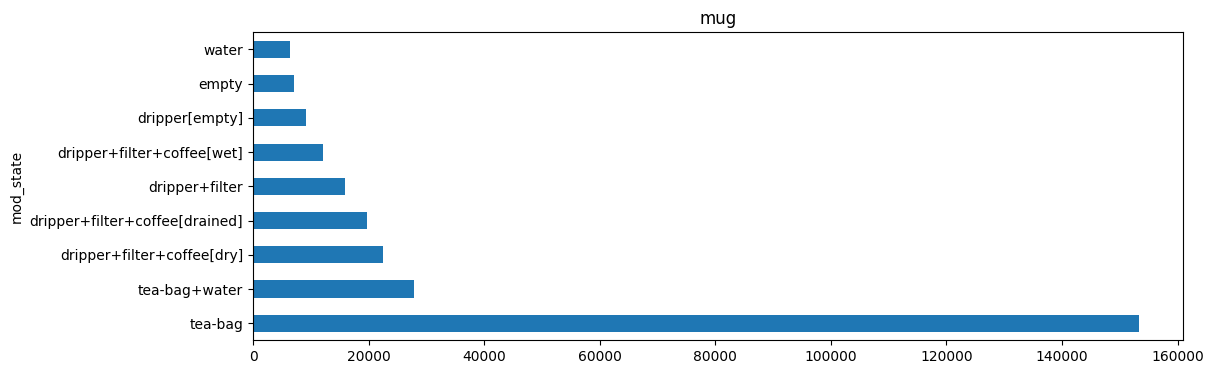

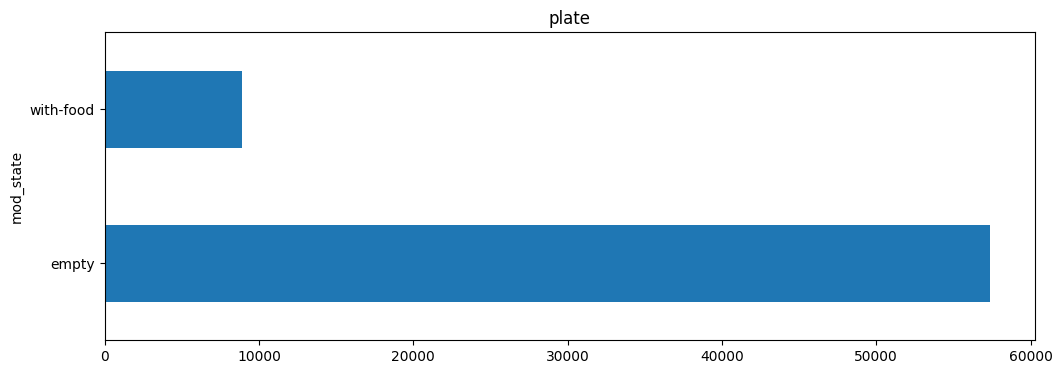

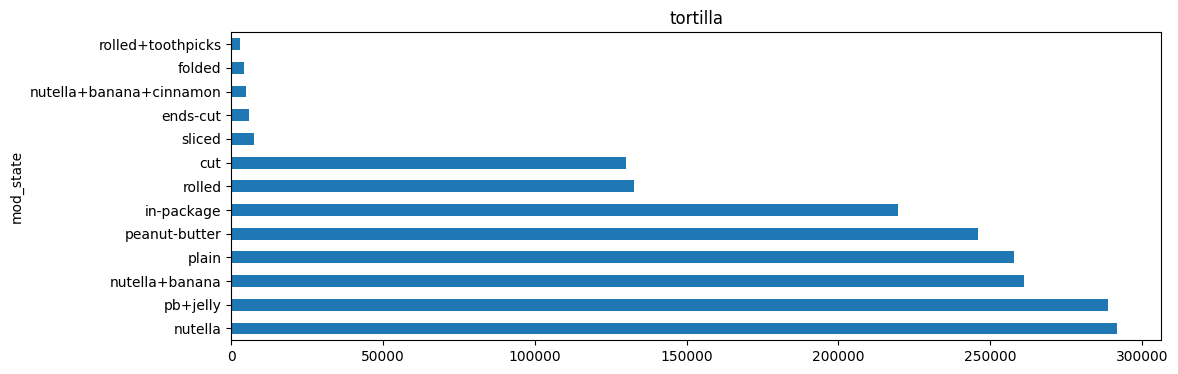

In [30]:
for obj, dfi in sdf.groupby('object'):
    plt.figure(figsize=(12, 4))
    # plt.subplot(121)
    dfi.mod_state.value_counts().plot.barh()
    # plt.subplot(122)
    # dfi.super_simple_state.value_counts().plot.bar()
    plt.title(obj)
    plt.show()

## Feature Visualization

In [31]:
# odf = sdf
# # odf = sdf[
# #     # (sdf.object == 'tortilla') &
# #     # ~sdf.mod_state.str.contains('dripper') & 
# #     # (df.video_id.str.contains('office')) & 
# #     # (df.video_id.str.contains('on')) & 
# #     ~sdf.augmented
# # ]
# odf.shape

In [32]:
odf = sdf
odf = sdf.groupby('mod_state', group_keys=False).apply(lambda x: x.sample(min(5000, len(x))))

# odf = odf.sample(min(20000, len(odf)))
X = np.array(list(odf.vector.values))
# y = odf.super_simple_state.values
y = odf.mod_state.fillna("nan").values
X.shape, y.shape

((147152, 512), (147152,))

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(15, 8))

In [34]:
# Step 0: Normalization
scaler = StandardScaler()
Z_norm = scaler.fit_transform(X)

# Step 1: PCA
pca = PCA(n_components=30)  # Choose the number of components based on your data
Z_pca = pca.fit_transform(Z_norm)
Z_pca.shape

(147152, 30)

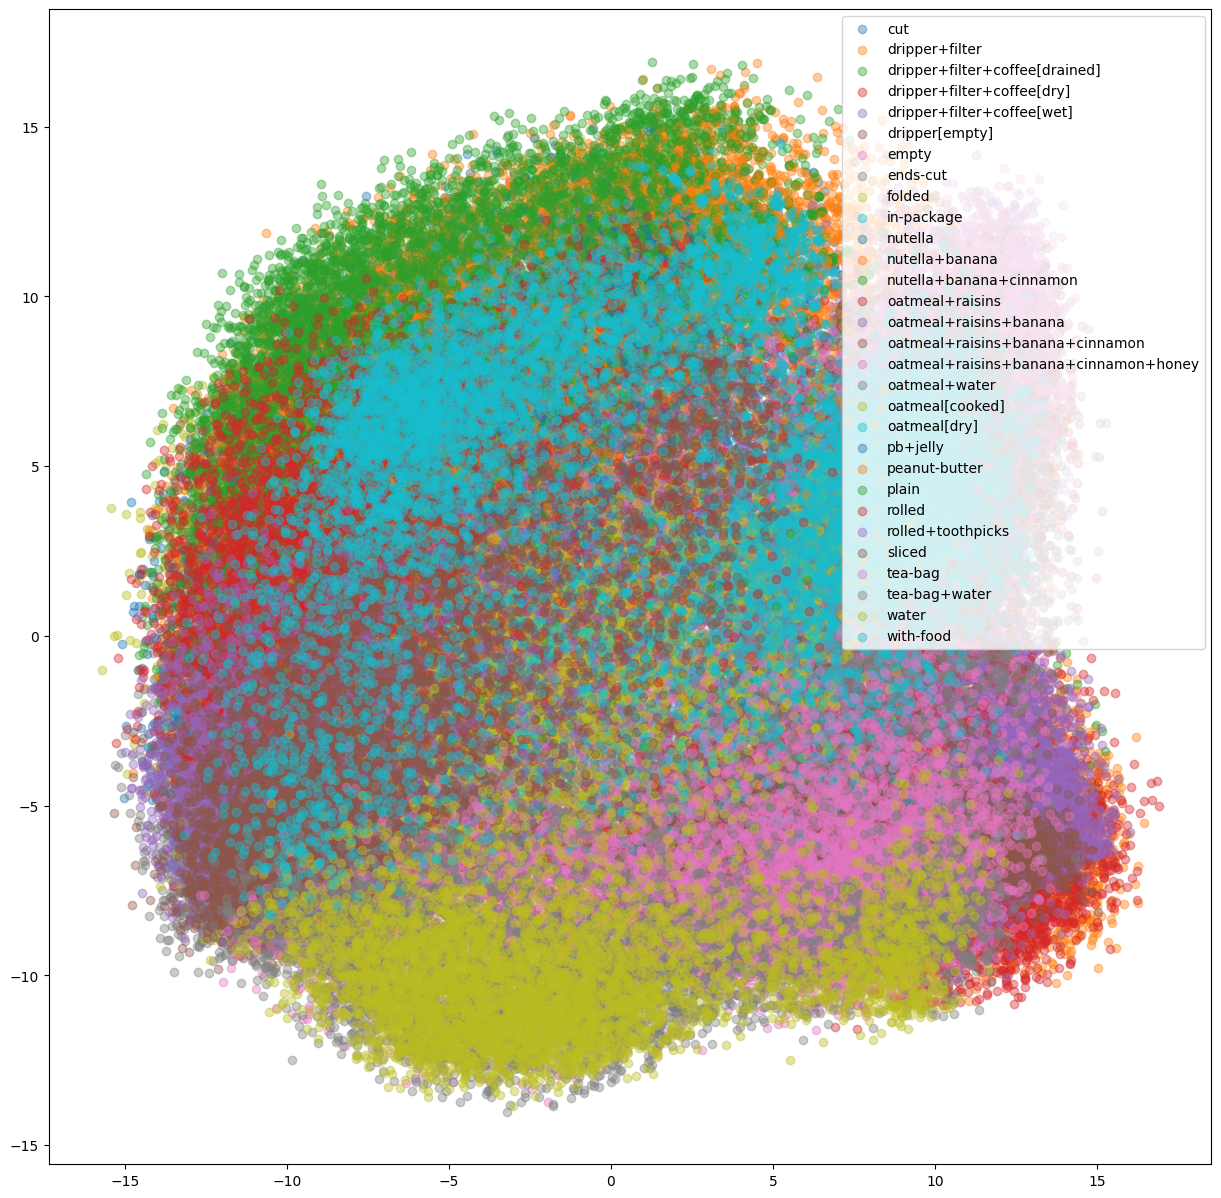

In [35]:
plt.figure(figsize=(15, 15))
for yi in np.unique(y):
    if yi != 'water[partial]':
        plt.scatter(Z_pca[y==yi, 0], Z_pca[y==yi, 1], label=yi, alpha=0.4)
plt.legend()
plt.savefig('pca-tortilla-allbv-aug.png')

In [ ]:
for obj_name, odf in sdf.groupby('object'):
    odf = sdf.groupby('mod_state', group_keys=False).apply(lambda x: x.sample(min(5000, len(x))))
    X = np.array(list(odf.vector.values))
    y = odf.mod_state.fillna("nan").values
    X.shape, y.shape

    # Step 0: Normalization
    scaler = StandardScaler()
    Z_norm = scaler.fit_transform(X)

    # Step 1: PCA
    pca = PCA(n_components=30)  # Choose the number of components based on your data
    Z_pca = pca.fit_transform(Z_norm)

    plt.figure(figsize=(10, 10))
    for yi in np.unique(y):
        if yi != 'water[partial]':
            plt.scatter(Z_pca[y==yi, 0], Z_pca[y==yi, 1], label=yi, alpha=0.4)
    plt.legend()
    plt.title(obj_name)
    plt.show()

In [48]:
odf=sdf

K=10000
has_aug=False
if not has_aug:
    odf = odf[~sdf.augmented]
odf = odf.groupby('mod_state', group_keys=False).apply(lambda x: x.sample(min(K, len(x))))
odf.groupby('object')[['mod_state', 'augmented']].value_counts().unstack()

augmented                                       False
object   mod_state                                   
bowl     empty                                   7150
         oatmeal+raisins                        10000
         oatmeal+raisins+banana                 10000
         oatmeal+raisins+banana+cinnamon        10000
         oatmeal+raisins+banana+cinnamon+honey  10000
         oatmeal+water                          10000
         oatmeal[cooked]                         1342
         oatmeal[dry]                           10000
mug      dripper+filter                          7916
         dripper+filter+coffee[drained]          9891
         dripper+filter+coffee[dry]             10000
         dripper+filter+coffee[wet]              6060
         dripper[empty]                          4622
         empty                                    314
         tea-bag                                10000
         tea-bag+water                           2316
         water                                    534
plate    empty                                   2536
         with-food                                741
tortilla cut                                    10000
         ends-cut                                 477
         folded                                   345
         in-package                             10000
         nutella                                10000
         nutella+banana                         10000
         nutella+banana+cinnamon                  420
         pb+jelly                               10000
         peanut-butter                          10000
         plain                                  10000
         rolled                                 10000
         rolled+toothpicks                        251
         sliced                                   638

In [49]:

f = static_tree.db_fname.format(emb_type=f"x2sampled{K}" + ('-aug' if has_aug else ''))
# f = static_tree.db_fname.format(emb_type=f"sampled{K}-aug")
print(f)
dump_db(f, odf)

/datasets/annotation_final/x2sampled10000.lancedb


  0%|          | 0/4 [00:00<?, ?it/s]

bowl 68492
              index      track_id
count  68492.000000  68492.000000
mean    1066.163873      2.682561
std      626.747234      2.862060
min        1.000000      0.000000
25%      627.000000      0.000000
50%     1032.000000      2.000000
75%     1428.000000      4.000000
max     5190.000000     16.000000


 25%|██▌       | 1/4 [00:01<00:04,  1.47s/it]

mug 51653
              index      track_id
count  51653.000000  51653.000000
mean    1205.391420      2.181713
std      792.156966      2.667310
min       60.000000      0.000000
25%      714.000000      0.000000
50%     1105.000000      1.000000
75%     1496.000000      4.000000
max     5705.000000     12.000000


 50%|█████     | 2/4 [00:02<00:02,  1.25s/it]

plate 3277
             index  track_id
count  3277.000000    3277.0
mean   1056.173634       0.0
std     587.738776       0.0
min       1.000000       0.0
25%     547.000000       0.0
50%    1064.000000       0.0
75%    1598.000000       0.0
max    2044.000000       0.0


 75%|███████▌  | 3/4 [00:02<00:00,  1.28it/s]

tortilla 82131
              index      track_id
count  82131.000000  82131.000000
mean    1199.788022      0.331872
std      717.321367      1.240776
min       92.000000      0.000000
25%      670.000000      0.000000
50%     1158.000000      0.000000
75%     1644.000000      0.000000
max     8425.000000     20.000000


100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


## Extra

In [ ]:
oodf = odf.groupby('mod_state', group_keys=False).apply(lambda x: x.sample(min(2000, len(x))))
oodf.groupby('object').mod_state.value_counts()

object    mod_state                            
bowl      oatmeal+raisins                          2000
          oatmeal[dry]                             2000
          oatmeal+water                            2000
          oatmeal+raisins+banana+cinnamon+honey    2000
          oatmeal+raisins+banana+cinnamon          2000
          oatmeal+raisins+banana                   2000
          empty                                    1436
          oatmeal[cooked]                          1342
          oatmeal+raisins+cinnamon+honey            196
          oatmeal+raisins+cinnamon                  189
mug       dripper+filter+coffee[dry]               2000
          tea-bag+water                            2000
          tea-bag                                  2000
          dripper[empty]                           2000
          dripper+filter                           2000
          water                                     534
          empty                                      68


In [ ]:
X = np.array(list(oodf.vector.values))
y = oodf.mod_state.fillna("nan").values
X.shape, y.shape

((45628, 512), (45628,))

In [ ]:
# Step 0: Normalization
scaler = StandardScaler()
Z_norm = scaler.fit_transform(X1)

# Step 1: PCA
pca = PCA(n_components=30)  # Choose the number of components based on your data
Z_pca = pca.fit_transform(Z_norm)
Z_pca.shape

(102566, 30)

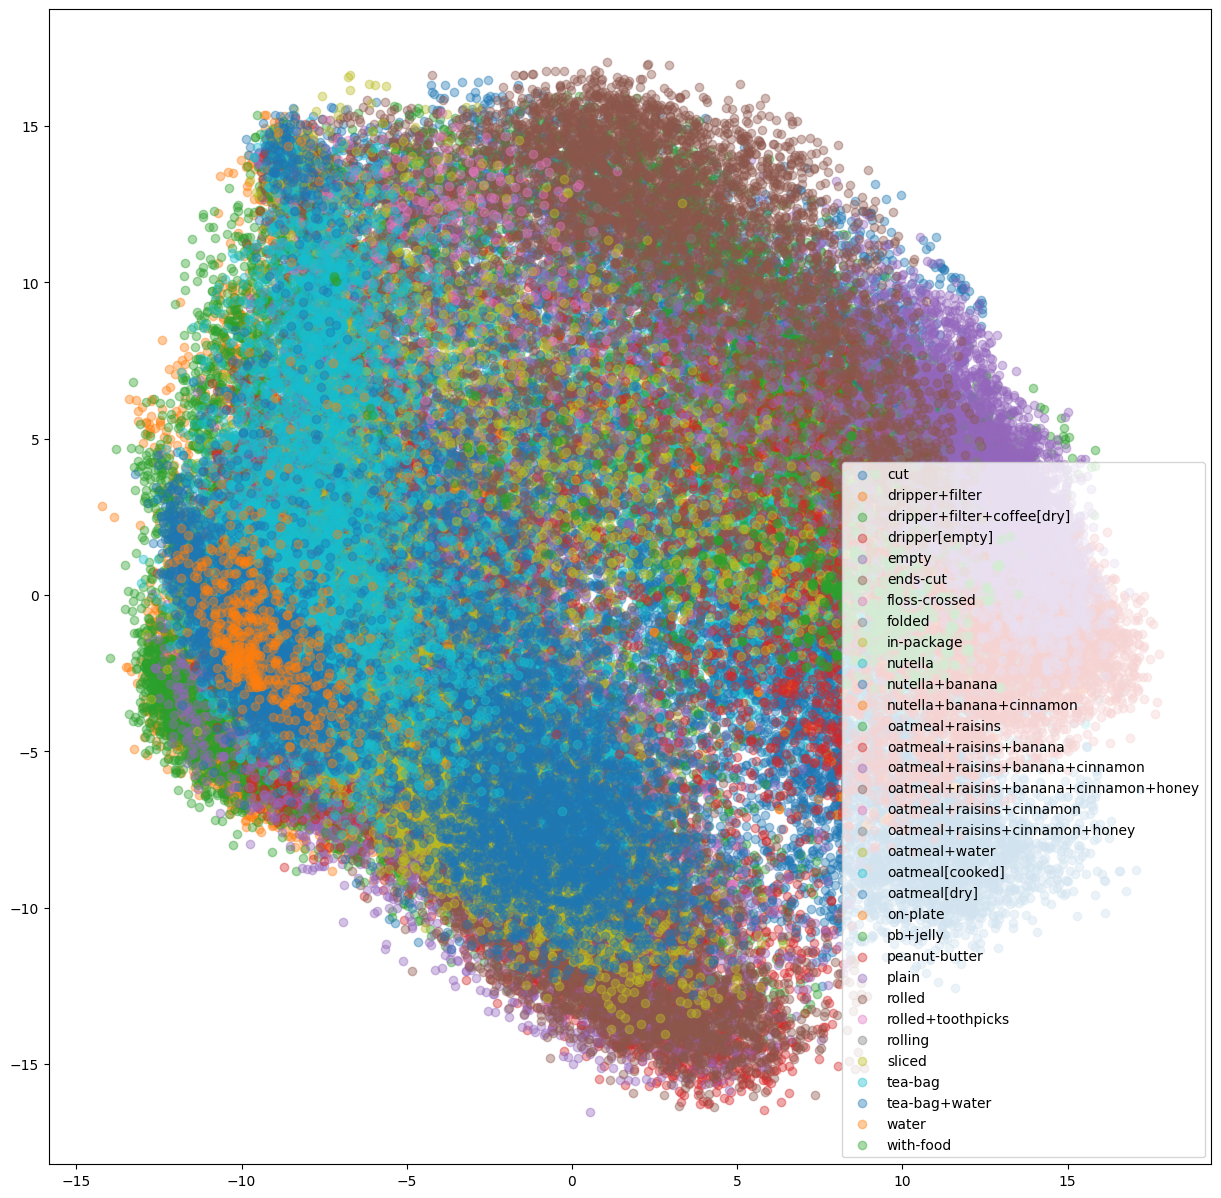

In [ ]:
plt.figure(figsize=(15, 15))
for yi in np.unique(y):
    plt.scatter(Z_pca[y1==yi, 0], Z_pca[y1==yi, 1], label=yi, alpha=0.4)
plt.legend()
plt.savefig('pca-tortilla-allbv-aug.png')

In [ ]:
# Z_pcan.shape

In [ ]:
# Xn=np.array(list(df.vector.values))
# Z_pcan=pca.transform(Xn)
# yn = df.super_simple_state.values
# plt.figure(figsize=(15, 15))
# for yi in np.unique(yn):
#     plt.scatter(Z_pcan[yn==yi, 0], Z_pca[yn==yi, 1], label=yi, alpha=0.4)
# plt.legend()

In [ ]:
# from sklearn.manifold import Isomap

# proj = Isomap(n_components=2)
# Zt = proj.fit_transform(X)
# Zt.shape

In [ ]:
# plt.figure(figsize=(15, 15))
# for yi in np.unique(y):
#     plt.scatter(Zt[y==yi, 0], Zt[y==yi, 1], label=yi, alpha=0.4)
# plt.legend()

In [ ]:
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2)
# Z_tsne = tsne.fit_transform(X)
# Z_tsne.shape

KeyboardInterrupt: 

In [ ]:
# plt.figure(figsize=(12, 12))
# for yi in np.unique(y):
#     plt.scatter(Z_tsne[y==yi, 0], Z_tsne[y==yi, 1], label=yi, alpha=0.4)
# plt.legend()

In [ ]:
def cluster_reduce(data, y, n_clusters=200, n_pts_per_cluster=20, n_clusters_per_class=10):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.cluster import KMeans

    # normalize
    scaler = StandardScaler()
    data = scaler.fit_transform(data)

    # pca
    print(data.shape)
    pca = PCA(n_components=30)  # Choose the number of components based on your data
    data_pca = pca.fit_transform(data)
    print(data_pca.shape)

    plt.figure(figsize=(15, 15))
    for yi in np.unique(y):
        plt.scatter(data_pca[y==yi, 0], data_pca[y==yi, 1], label=yi)
    plt.legend()
    plt.savefig("PCA.png")
    plt.close()

    # down select approximately to have more balanced classes
    _, inv, counts = np.unique(y, return_inverse=True, return_counts=True)
    p = 1 / counts[inv]
    p = p / p.sum()
    n = n_clusters * n_pts_per_cluster * 10
    if n < len(y):
        idxs = np.random.choice(len(y), min(n, len(y)), p=p, replace=False)
        np.sort(idxs)
        data = data[idxs]

    # k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    clusters = kmeans.labels_
    unique, count = np.unique(clusters, return_counts=True)
    for c, u in sorted(zip(count, unique)):
        print(u, c)

    # Sample a fixed number of points from each cluster
    sampled_points = []
    cluster_indices = {}
    for i in np.unique(clusters):
        indices = np.where(clusters == i)[0]
        y_counts = pd.Series(y[indices]).value_counts()
        y_top = y_counts.index[0]
        cluster_indices.setdefault(y_top, []).append((i, y_counts, indices))

    # sample the most distinct clusters for each class
    sampled_points = []
    for y_top, xs in cluster_indices.items():
        # print(y_top, len(xs))
        xs = sorted(xs, key=lambda x: (x[1]/x[1].sum()).iloc[0], reverse=True)
        for (i, c, indices) in xs[:n_clusters_per_class]:
            # print(i, c)
            sampled_points.extend(indices)
        # print(i, len(indices), pd.Series(y[indices]).value_counts().iloc[:2].to_dict())
        # if len(indices) > n_pts_per_cluster:
        #     indices = np.random.choice(indices, n_pts_per_cluster, replace=False)
        # sampled_points.extend(indices)
    return np.array(sorted(sampled_points))

In [ ]:
# indices = cluster_reduce(X, y)
# X1 = X[indices]
# y1 = y[indices]
# len(X), len(X1)

In [ ]:
# Step 0: Normalization
scaler = StandardScaler()
Z_norm = scaler.fit_transform(X1)

# Step 1: PCA
pca = PCA(n_components=30)  # Choose the number of components based on your data
Z_pca = pca.fit_transform(Z_norm)
Z_pca.shape

(5454, 30)

In [ ]:
plt.figure(figsize=(15, 15))
for yi in np.unique(y1):
    plt.scatter(Z_pca[y1==yi, 0], Z_pca[y1==yi, 1], label=yi, alpha=0.4)
plt.legend()

NameError: name 'y1' is not defined

<Figure size 1500x1500 with 0 Axes>

In [71]:
oodf=odf
oodf.groupby('object').mod_state.value_counts()

object    mod_state                            
bowl      oatmeal+raisins                          5000
          oatmeal[dry]                             5000
          oatmeal[cooked]                          5000
          oatmeal+water                            5000
          oatmeal+raisins+banana+cinnamon+honey    5000
          oatmeal+raisins+banana+cinnamon          5000
          oatmeal+raisins+banana                   5000
          oatmeal+raisins+cinnamon+honey           2352
          oatmeal+raisins+cinnamon                 2268
          empty                                    2021
mug       water                                    5000
          tea-bag+water                            5000
          tea-bag                                  5000
          dripper[empty]                           5000
          dripper+filter+coffee[dry]               5000
          dripper+filter                           5000
          empty                                     311


In [72]:
static_tree

<Paths data={'root_dir': '/datasets/annotation_final'} 
	dataset_dir : /datasets/annotation_final
	emb_file : /datasets/annotation_final/embeddings-all/{field_name}/{video_id}/{emb_type}/{track_id}.npz
	db_fname : /datasets/annotation_final/{emb_type}.lancedb
	pkl : /datasets/annotation_final/embs.npz
>

In [83]:
odf = sdf[~sdf.augmented]
K=10000
odf = odf.groupby('mod_state', group_keys=False).apply(lambda x: x.sample(min(K, len(x))))
odf.groupby('object').mod_state.value_counts()

object    mod_state                            
bowl      oatmeal+raisins                          10000
          oatmeal+raisins+banana                   10000
          oatmeal+raisins+banana+cinnamon          10000
          oatmeal+raisins+banana+cinnamon+honey    10000
          oatmeal+water                            10000
          oatmeal[dry]                             10000
          empty                                     7182
          oatmeal[cooked]                           1342
mug       tea-bag                                  10000
          dripper+filter+coffee[dry]                8210
          dripper+filter                            5170
          dripper[empty]                            4622
          tea-bag+water                             2316
          water                                      534
          empty                                      302
plate     empty                                     2516
          with-food                     

In [84]:
odf['super_simple_state'] = odf['mod_state']
# f = static_tree.db_fname.format(emb_type=f"full")
f = static_tree.db_fname.format(emb_type=f"sampled{K}")
# f = static_tree.db_fname.format(emb_type=f"sampled{K}-aug")
print(f)
dump_db(f, odf)

/datasets/annotation_final/sampled10000.lancedb


  0%|          | 0/4 [00:00<?, ?it/s]

bowl 68524
              index      track_id
count  68524.000000  68524.000000
mean    1069.836072      2.702411
std      629.037129      2.872624
min        1.000000      0.000000
25%      628.000000      0.000000
50%     1039.000000      2.000000
75%     1430.000000      4.000000
max     5197.000000     16.000000


 25%|██▌       | 1/4 [00:01<00:04,  1.57s/it]

mug 31154
              index      track_id
count  31154.000000  31154.000000
mean    1324.788663      3.017558
std      928.961684      2.612741
min       65.000000      0.000000
25%      769.000000      1.000000
50%     1161.000000      3.000000
75%     1541.000000      4.000000
max     5705.000000     10.000000


 50%|█████     | 2/4 [00:02<00:02,  1.09s/it]

plate 3257
             index  track_id
count  3257.000000    3257.0
mean   1039.818852       0.0
std     595.403149       0.0
min       1.000000       0.0
25%     523.000000       0.0
50%    1037.000000       0.0
75%    1604.000000       0.0
max    2044.000000       0.0


 75%|███████▌  | 3/4 [00:02<00:00,  1.42it/s]

tortilla 82131
              index      track_id
count  82131.000000  82131.000000
mean    1200.110202      0.332140
std      717.570550      1.232552
min       92.000000      0.000000
25%      668.000000      0.000000
50%     1157.000000      0.000000
75%     1644.500000      0.000000
max     8425.000000     20.000000


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


In [52]:
f=static_tree.db_fname.glob_format()

In [ ]:
!du -h --max-depth 1 $f

471M	/datasets/annotation_final/clip.lancedb/mug.lance
1.6G	/datasets/annotation_final/clip.lancedb/bowl.lance
137M	/datasets/annotation_final/clip.lancedb/plate.lance
3.8G	/datasets/annotation_final/clip.lancedb/tortilla.lance
11G	/datasets/annotation_final/clip.lancedb
23M	/datasets/annotation_final/sampled2k.lancedb/mug.lance
33M	/datasets/annotation_final/sampled2k.lancedb/bowl.lance
2.7M	/datasets/annotation_final/sampled2k.lancedb/plate.lance
40M	/datasets/annotation_final/sampled2k.lancedb/tortilla.lance
97M	/datasets/annotation_final/sampled2k.lancedb
49M	/datasets/annotation_final/sampled5k.lancedb/mug.lance
76M	/datasets/annotation_final/sampled5k.lancedb/bowl.lance
4.3M	/datasets/annotation_final/sampled5k.lancedb/plate.lance
90M	/datasets/annotation_final/sampled5k.lancedb/tortilla.lance
218M	/datasets/annotation_final/sampled5k.lancedb


In [ ]:
dump_db(tree.db_fname.format(emb_type="clip_office_noaug"), odf)

  0%|          | 0/1 [00:00<?, ?it/s]

tortilla 24339
              index      track_id
count  24339.000000  24339.000000
mean    1175.280784      0.198324
std      585.736135      0.530122
min      116.000000      0.000000
25%      688.000000      0.000000
50%     1156.000000      0.000000
75%     1631.000000      0.000000
max     2771.000000      2.000000


100%|██████████| 1/1 [00:01<00:00,  1.20s/it]
